# Question?

### Can you estiamate  price by its commodity, category or province?



# Data Acquisition
### https://www.kaggle.com/datasets/amaanfaheem/pakistan-food-prices-2022

### About Dataset
This dataset contains Food Prices data for Pakistan, sourced from the World Food Programmed Price Database. The World Food Programmed Price Database covers foods such as maize, rice, beans, fish, and sugar for 98 countries and some 3000 markets. It is updated weekly but contains to a large extent monthly data. The data goes back as far.

### Let us import the necessary liabraries and read our DataSet

In [199]:
# just get rid of errors
import warnings
warnings.simplefilter("ignore")

In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import linear_model, svm

## Extract, Transform, Load and Data wrangling

### Extraction

In [201]:
df = pd.read_csv("wfp_food_prices_pak.csv") # reading from CSV

In [202]:
df

date      Provinces name City Name City market   latitude  \
0      1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
1      1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
2      1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
3      1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
4      1/15/2004              PUNJAB    Lahore      Lahore  31.549722   
...          ...                 ...       ...         ...        ...   
11895  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11896  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11897  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11898  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11899  3/15/2024               SINDH   Karachi     Karachi  24.905600   

       longitude            category               commodity unit priceflag  \
0      67.012500  cereals and tubers  Rice (basmati, broken)   KG    actual   
1      67.012500  cereals and tubers             Wheat flour   KG    actual   
2      71.580182  cereals and tubers  Rice (basmati, broken)   KG    actual   
3      71.580182  cereals and tubers             Wheat flour   KG    actual   
4      74.343611  cereals and tubers  Rice (basmati, broken)   KG    actual   
...          ...                 ...                     ...  ...       ...   
11895  67.082200        oil and fats       Ghee (artificial)   KG    actual   
11896  67.082200        oil and fats           Oil (cooking)    L    actual   
11897  67.082200     pulses and nuts             Beans(mash)   KG    actual   
11898  67.082200     pulses and nuts         Lentils (masur)   KG    actual   
11899  67.082200     pulses and nuts         Lentils (moong)   KG    actual   

      pricetype currency   price  usd price  
0        Retail      PKR   20.00     0.3499  
1        Retail      PKR   13.00     0.2274  
2        Retail      PKR   17.59     0.3076  
3        Retail      PKR   12.00     0.2099  
4        Retail      PKR   19.15     0.3350  
...         ...      ...     ...        ...  
11895    Retail      PKR  514.00     1.8449  
11896    Retail      PKR  528.04     1.8953  
11897    Retail      PKR  507.53     1.8217  
11898    Retail      PKR  342.36     1.2289  
11899    Retail      PKR  306.73     1.1010  

[11900 rows x 14 columns]

In [203]:
df.columns # some names are capital letters

Index(['date', 'Provinces name', 'City Name', 'City market', 'latitude',
       'longitude', 'category', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usd price'],
      dtype='object')

In [204]:
df.head(5) # printing first 5 rows

date      Provinces name City Name City market   latitude  longitude  \
0  1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222  67.012500   
1  1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222  67.012500   
2  1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366  71.580182   
3  1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366  71.580182   
4  1/15/2004              PUNJAB    Lahore      Lahore  31.549722  74.343611   

             category               commodity unit priceflag pricetype  \
0  cereals and tubers  Rice (basmati, broken)   KG    actual    Retail   
1  cereals and tubers             Wheat flour   KG    actual    Retail   
2  cereals and tubers  Rice (basmati, broken)   KG    actual    Retail   
3  cereals and tubers             Wheat flour   KG    actual    Retail   
4  cereals and tubers  Rice (basmati, broken)   KG    actual    Retail   

  currency  price  usd price  
0      PKR  20.00     0.3499  
1      PKR  13.00     0.2274  
2      PKR  17.59     0.3076  
3      PKR  12.00     0.2099  
4      PKR  19.15     0.3350

In [205]:
df.tail(5) # printing last 5 rows

date Provinces name City Name City market  latitude  longitude  \
11895  3/15/2024          SINDH   Karachi     Karachi   24.9056    67.0822   
11896  3/15/2024          SINDH   Karachi     Karachi   24.9056    67.0822   
11897  3/15/2024          SINDH   Karachi     Karachi   24.9056    67.0822   
11898  3/15/2024          SINDH   Karachi     Karachi   24.9056    67.0822   
11899  3/15/2024          SINDH   Karachi     Karachi   24.9056    67.0822   

              category          commodity unit priceflag pricetype currency  \
11895     oil and fats  Ghee (artificial)   KG    actual    Retail      PKR   
11896     oil and fats      Oil (cooking)    L    actual    Retail      PKR   
11897  pulses and nuts        Beans(mash)   KG    actual    Retail      PKR   
11898  pulses and nuts    Lentils (masur)   KG    actual    Retail      PKR   
11899  pulses and nuts    Lentils (moong)   KG    actual    Retail      PKR   

        price  usd price  
11895  514.00     1.8449  
11896  528.04     1.8953  
11897  507.53     1.8217  
11898  342.36     1.2289  
11899  306.73     1.1010

In [206]:
df.sample(5) # printing random samples

date      Provinces name City Name City market   latitude  \
10885   3/15/2023  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
648    10/15/2007              PUNJAB    Lahore      Lahore  31.549722   
1380    1/15/2011         BALOCHISTAN    Quetta      Quetta  30.187222   
7562    9/15/2019              PUNJAB    Multan      Multan  30.195556   
6328    6/15/2018  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   

       longitude            category  \
10885  71.580182  miscellaneous food   
648    74.343611  cereals and tubers   
1380   67.012500  cereals and tubers   
7562   71.475278        oil and fats   
6328   71.580182            non-food   

                                           commodity unit priceflag pricetype  \
10885                                          Sugar   KG    actual    Retail   
648                                            Wheat   KG    actual    Retail   
1380                          Rice (basmati, broken)   KG    actual    Retail   
7562                                   Oil (cooking)    L    actual    Retail   
6328   Wage (non-qualified labour, non-agricultural)  Day    actual    Retail   

      currency   price  usd price  
10885      PKR  106.33     0.3757  
648        PKR   15.13     0.2498  
1380       PKR   60.75     0.7088  
7562       PKR  230.00     1.4807  
6328       PKR  600.00     5.0378

### Data wrangling


In [207]:
df.shape # data set shape 

(11900, 14)

In [208]:
df.info() # information about data set columns, null and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11900 entries, 0 to 11899
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            11900 non-null  object 
 1   Provinces name  11900 non-null  object 
 2   City Name       11900 non-null  object 
 3   City market     11900 non-null  object 
 4   latitude        11900 non-null  float64
 5   longitude       11900 non-null  float64
 6   category        11900 non-null  object 
 7   commodity       11900 non-null  object 
 8   unit            11900 non-null  object 
 9   priceflag       11900 non-null  object 
 10  pricetype       11900 non-null  object 
 11  currency        11900 non-null  object 
 12  price           11900 non-null  float64
 13  usd price       11900 non-null  float64
dtypes: float64(4), object(10)
memory usage: 1.3+ MB


In [209]:
df.describe()

latitude     longitude         price     usd price
count  11900.000000  11900.000000  11900.000000  11900.000000
mean      30.168759     70.324319    160.292006      1.080645
std        2.992211      2.842761    188.070991      1.106231
min       24.905600     67.012500      9.000000      0.086300
25%       30.187222     67.082200     50.000000      0.426975
50%       30.195556     71.475278    101.535000      0.732850
75%       31.549722     71.580182    189.212500      1.359325
max       34.008366     74.343611   1452.000000      7.374900

In [210]:
df.columns

Index(['date', 'Provinces name', 'City Name', 'City market', 'latitude',
       'longitude', 'category', 'commodity', 'unit', 'priceflag', 'pricetype',
       'currency', 'price', 'usd price'],
      dtype='object')

In [211]:
df["Provinces name"].describe()

count      11900
unique         4
top       PUNJAB
freq        4794
Name: Provinces name, dtype: object

In [212]:
df["commodity"].describe()

count                      11900
unique                        17
top       Rice (basmati, broken)
freq                        1215
Name: commodity, dtype: object

In [213]:
df["City market"].describe()

count        11900
unique           5
top       Peshawar
freq          2403
Name: City market, dtype: object

In [214]:
df.isnull().sum() # no null values

date              0
Provinces name    0
City Name         0
City market       0
latitude          0
longitude         0
category          0
commodity         0
unit              0
priceflag         0
pricetype         0
currency          0
price             0
usd price         0
dtype: int64

In [215]:
df["City market"].value_counts()

City market
Peshawar    2403
Karachi     2402
Multan      2398
Lahore      2396
Quetta      2301
Name: count, dtype: int64

In [216]:
df["commodity"].value_counts()

commodity
Rice (basmati, broken)                           1215
Wheat flour                                      1215
Rice (coarse)                                    1093
Wheat                                             992
Poultry                                           657
Sugar                                             657
Oil (cooking)                                     657
Ghee (artificial)                                 655
Fuel (diesel)                                     615
Beans(mash)                                       590
Wage (non-qualified labour, non-agricultural)     578
Lentils (masur)                                   578
Eggs                                              563
Fuel (petrol-gasoline)                            560
Lentils (moong)                                   540
Milk                                              530
Salt                                              205
Name: count, dtype: int64

In [217]:
df.duplicated().sum() # no duplicated values

0

In [218]:
df.drop(['usd price','priceflag','pricetype','currency'],axis=1,inplace=True)  # dropping uncessory columns
# if you run more than one time it will give you error

In [219]:
df

date      Provinces name City Name City market   latitude  \
0      1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
1      1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
2      1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
3      1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
4      1/15/2004              PUNJAB    Lahore      Lahore  31.549722   
...          ...                 ...       ...         ...        ...   
11895  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11896  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11897  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11898  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11899  3/15/2024               SINDH   Karachi     Karachi  24.905600   

       longitude            category               commodity unit   price  
0      67.012500  cereals and tubers  Rice (basmati, broken)   KG   20.00  
1      67.012500  cereals and tubers             Wheat flour   KG   13.00  
2      71.580182  cereals and tubers  Rice (basmati, broken)   KG   17.59  
3      71.580182  cereals and tubers             Wheat flour   KG   12.00  
4      74.343611  cereals and tubers  Rice (basmati, broken)   KG   19.15  
...          ...                 ...                     ...  ...     ...  
11895  67.082200        oil and fats       Ghee (artificial)   KG  514.00  
11896  67.082200        oil and fats           Oil (cooking)    L  528.04  
11897  67.082200     pulses and nuts             Beans(mash)   KG  507.53  
11898  67.082200     pulses and nuts         Lentils (masur)   KG  342.36  
11899  67.082200     pulses and nuts         Lentils (moong)   KG  306.73  

[11900 rows x 10 columns]

In [220]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [221]:
df

date      Provinces name City Name City market   latitude  \
0      1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
1      1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
2      1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
3      1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
4      1/15/2004              PUNJAB    Lahore      Lahore  31.549722   
...          ...                 ...       ...         ...        ...   
11895  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11896  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11897  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11898  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11899  3/15/2024               SINDH   Karachi     Karachi  24.905600   

       longitude            category               commodity unit   price  \
0      67.012500  cereals and tubers  Rice (basmati, broken)   KG   20.00   
1      67.012500  cereals and tubers             Wheat flour   KG   13.00   
2      71.580182  cereals and tubers  Rice (basmati, broken)   KG   17.59   
3      71.580182  cereals and tubers             Wheat flour   KG   12.00   
4      74.343611  cereals and tubers  Rice (basmati, broken)   KG   19.15   
...          ...                 ...                     ...  ...     ...   
11895  67.082200        oil and fats       Ghee (artificial)   KG  514.00   
11896  67.082200        oil and fats           Oil (cooking)    L  528.04   
11897  67.082200     pulses and nuts             Beans(mash)   KG  507.53   
11898  67.082200     pulses and nuts         Lentils (masur)   KG  342.36   
11899  67.082200     pulses and nuts         Lentils (moong)   KG  306.73   

       year  
0      2004  
1      2004  
2      2004  
3      2004  
4      2004  
...     ...  
11895  2024  
11896  2024  
11897  2024  
11898  2024  
11899  2024  

[11900 rows x 11 columns]

In [222]:
time = df["date"].str.split("/", expand=True)
df[["month", "day", "year"]] = time.astype(int)

In [223]:
cols = df[['Provinces name', 'City Name', 'City market', 'category', 'commodity']]

for i in cols.columns:
    print("\n", df[i].unique())    


 ['BALOCHISTAN' 'KHYBER PAKHTUNKHWA' 'PUNJAB' 'SINDH']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['cereals and tubers' 'meat, fish and eggs' 'miscellaneous food'
 'oil and fats' 'non-food' 'pulses and nuts' 'milk and dairy']

 ['Rice (basmati, broken)' 'Wheat flour' 'Rice (coarse)' 'Wheat' 'Poultry'
 'Sugar' 'Ghee (artificial)' 'Oil (cooking)' 'Eggs'
 'Wage (non-qualified labour, non-agricultural)' 'Lentils (masur)'
 'Fuel (diesel)' 'Beans(mash)' 'Milk' 'Salt' 'Fuel (petrol-gasoline)'
 'Lentils (moong)']


### Data visualization

In [224]:
map = px.scatter_mapbox(df, lat="latitude", lon="longitude",size='price',color='price',hover_data=["price", "commodity"])

In [225]:
map.update_layout(mapbox_style="open-street-map") 

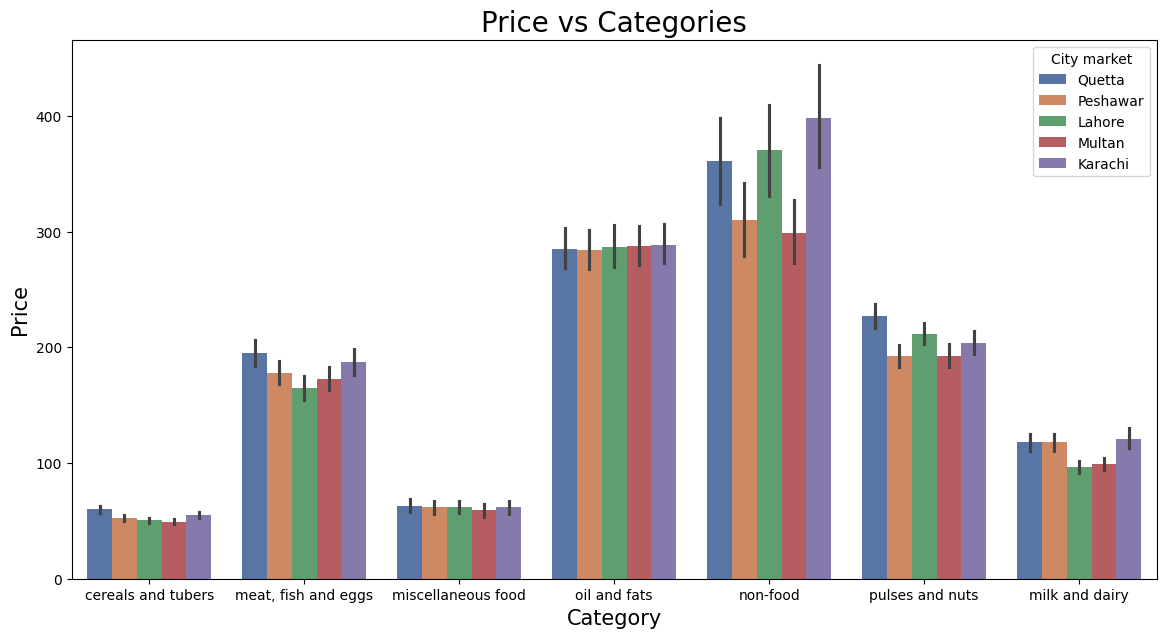

In [226]:
fig = plt.subplots(figsize=(14, 7))
sns.barplot(x = df["category"], y = df["price"], hue = df["City market"], palette="deep")
plt.xticks(rotation=0);
plt.xlabel("Category", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price vs Categories", fontsize=20)
plt.savefig('sample_plot.png')


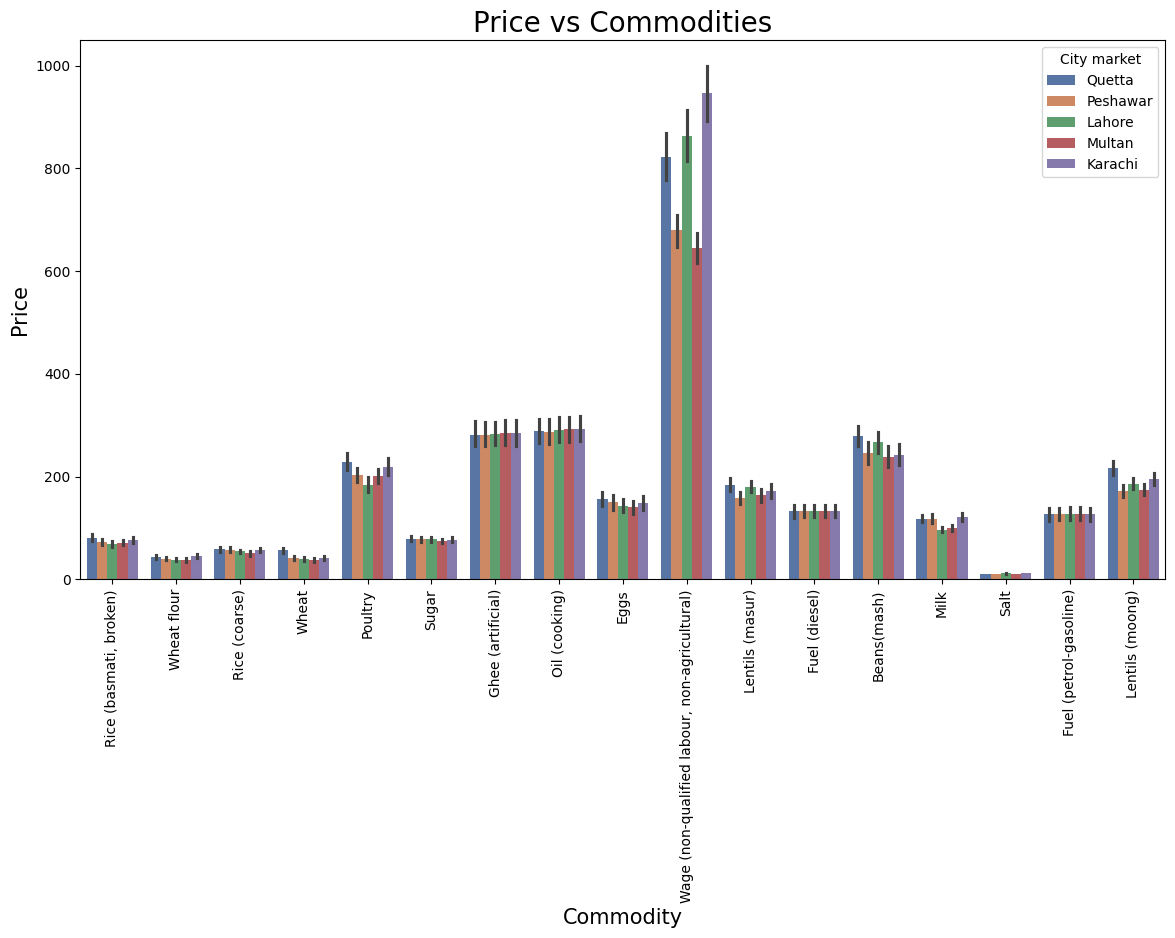

In [227]:
fig = plt.subplots(figsize=(14, 7))
sns.barplot(x=df["commodity"], y=df["price"], hue=df["City market"],palette="deep")
plt.xticks(rotation=90);
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price vs Commodities", fontsize=20)
plt.savefig('Price vs Commodities.png')

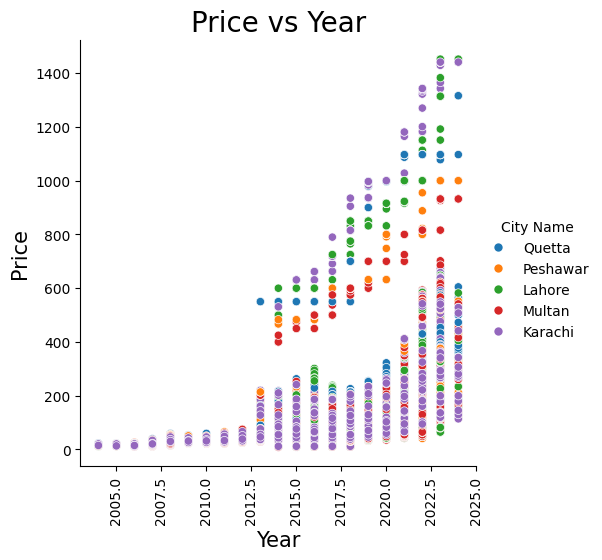

In [228]:
df["year"].astype("int")
sns.relplot(x=df["year"], y=df["price"], hue=df["City Name"])
plt.xticks(rotation=90);
plt.xlabel("Year", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price vs Year", fontsize=20)
plt.savefig('Price vs Year.png')

In [229]:
# Create 3D scatter plot
fig = px.scatter_3d(df, x="commodity", y="City market", z="price",
    #labels={"lon": "longitude", "lat": "latitude", "price": "price"},
    width=1000,
    height=1000,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 3, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()


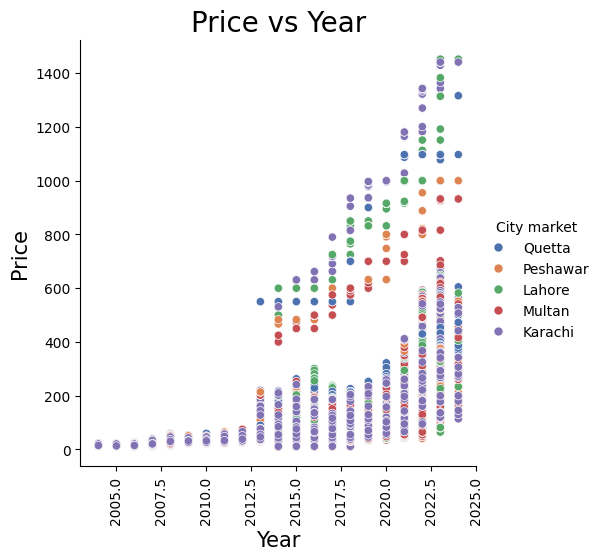

In [230]:
#fig = plt.subplots(figsize=(16, 9))
sns.relplot(x=df["year"], y=df["price"], hue=df["City market"],palette="deep")
plt.xticks(rotation=90);
plt.xlabel("Year", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price vs Year", fontsize=20)
plt.savefig('Price vs Year.png')
plt.show()

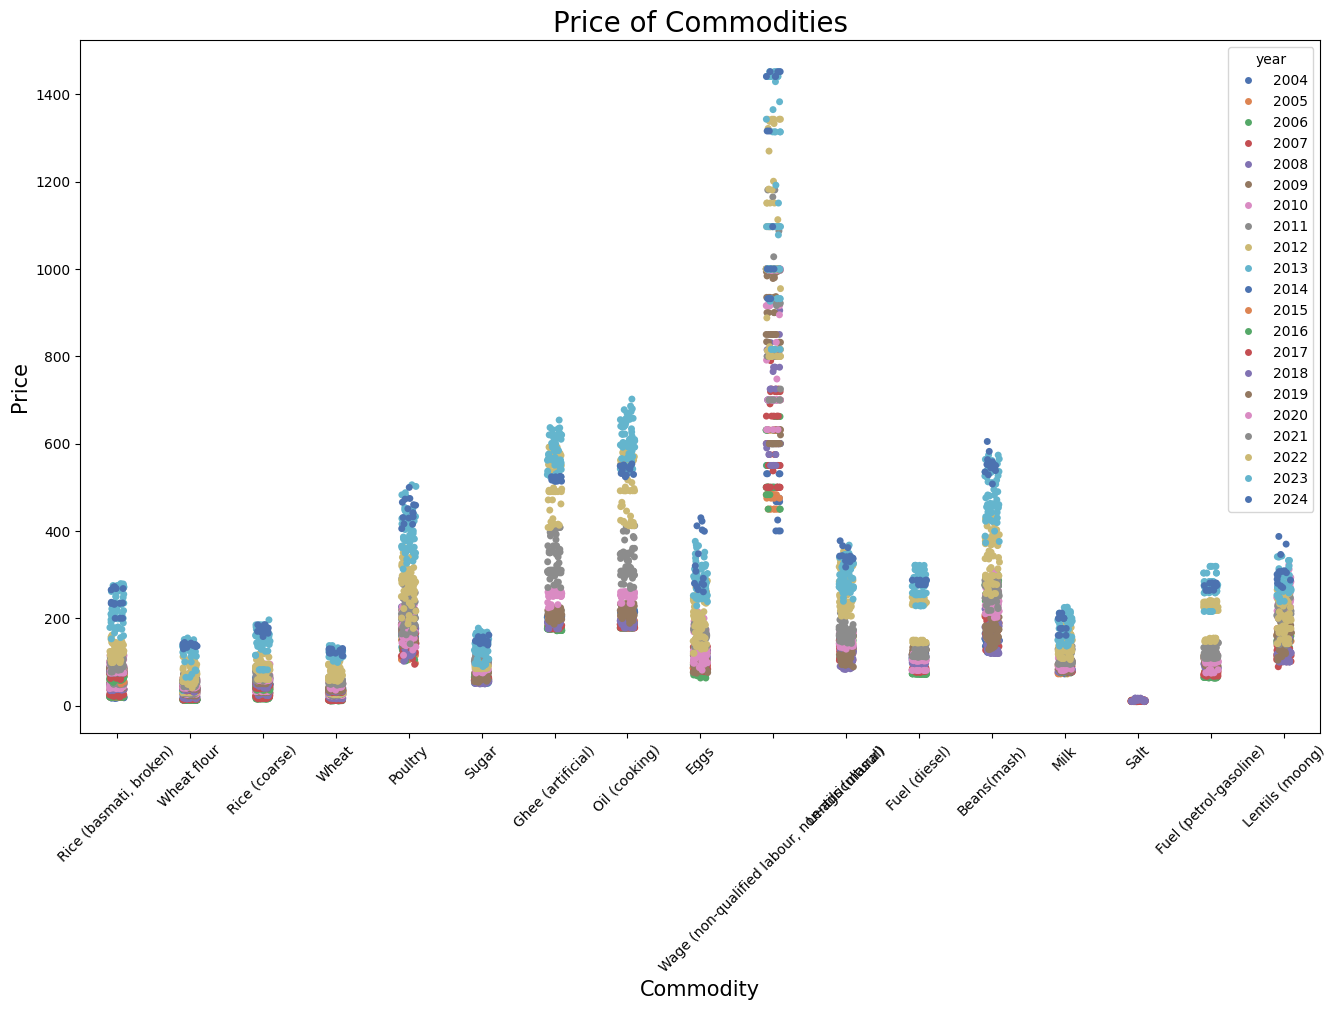

In [231]:
fig = plt.subplots(figsize=(16, 9))
sns.stripplot(x=df["commodity"], y=df["price"], hue=df["year"],palette="deep")
plt.xticks(rotation=45);
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Commodities", fontsize=20)
plt.savefig('Price vs Commodities.png')
plt.show()

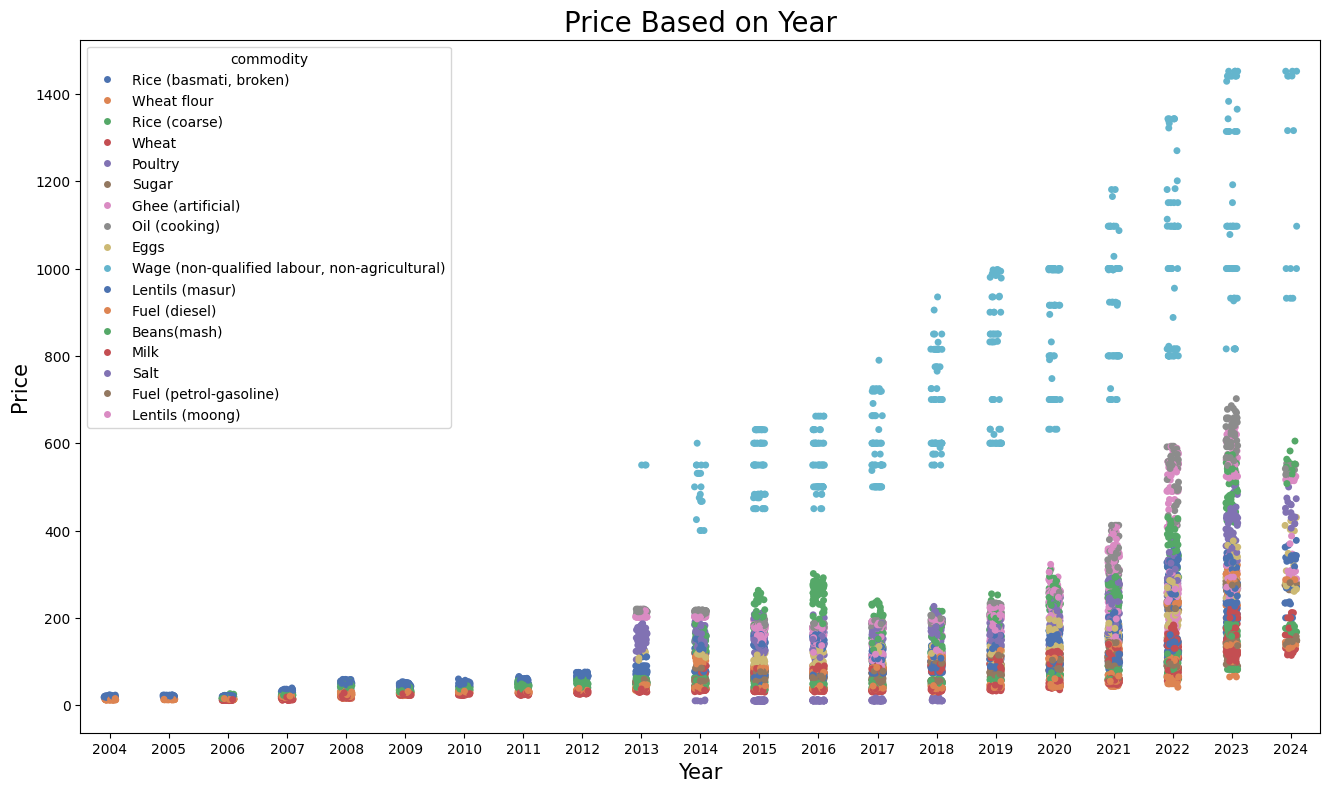

In [232]:
fig = plt.subplots(figsize=(16, 9))
sns.stripplot(x=df["year"], y=df["price"], hue=df["commodity"],palette="deep")
plt.xlabel("Year", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price Based on Year", fontsize=20)
plt.savefig('Price Based on Year.png')
plt.show()

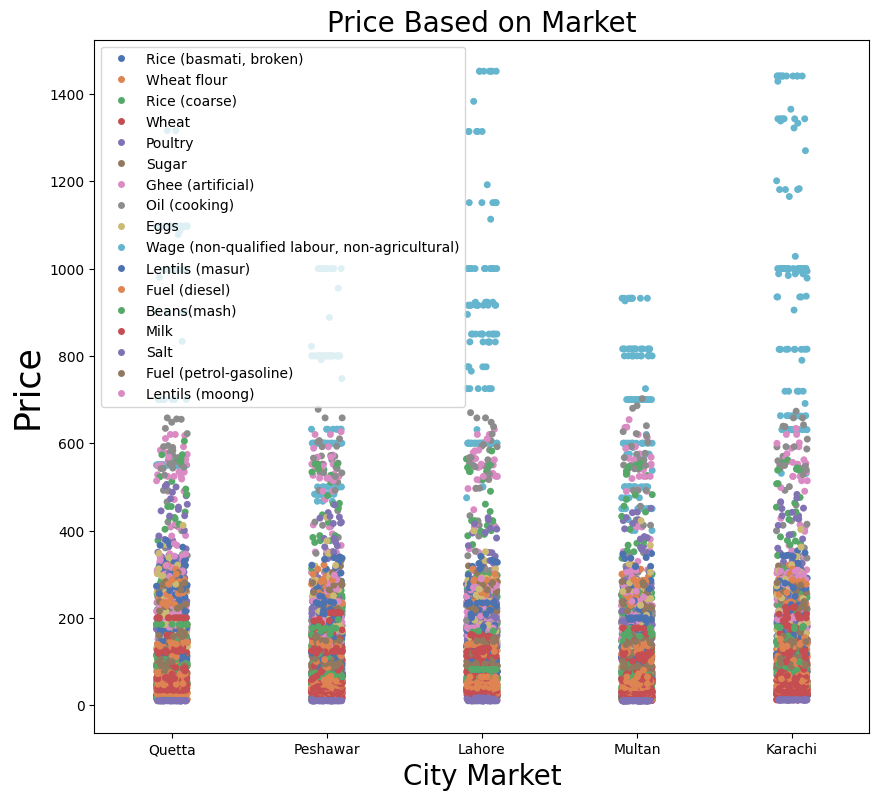

In [233]:
fig = plt.subplots(figsize=(10, 9))
sns.stripplot(x=df["City market"], y=df["price"], hue=df["commodity"],palette="deep")
plt.xlabel("City Market", fontsize=20)
plt.ylabel("Price", fontsize=25)
plt.title("Price Based on Market", fontsize=20)
plt.legend(loc ="upper left")
plt.savefig('Price Based on Market.png')
plt.show()


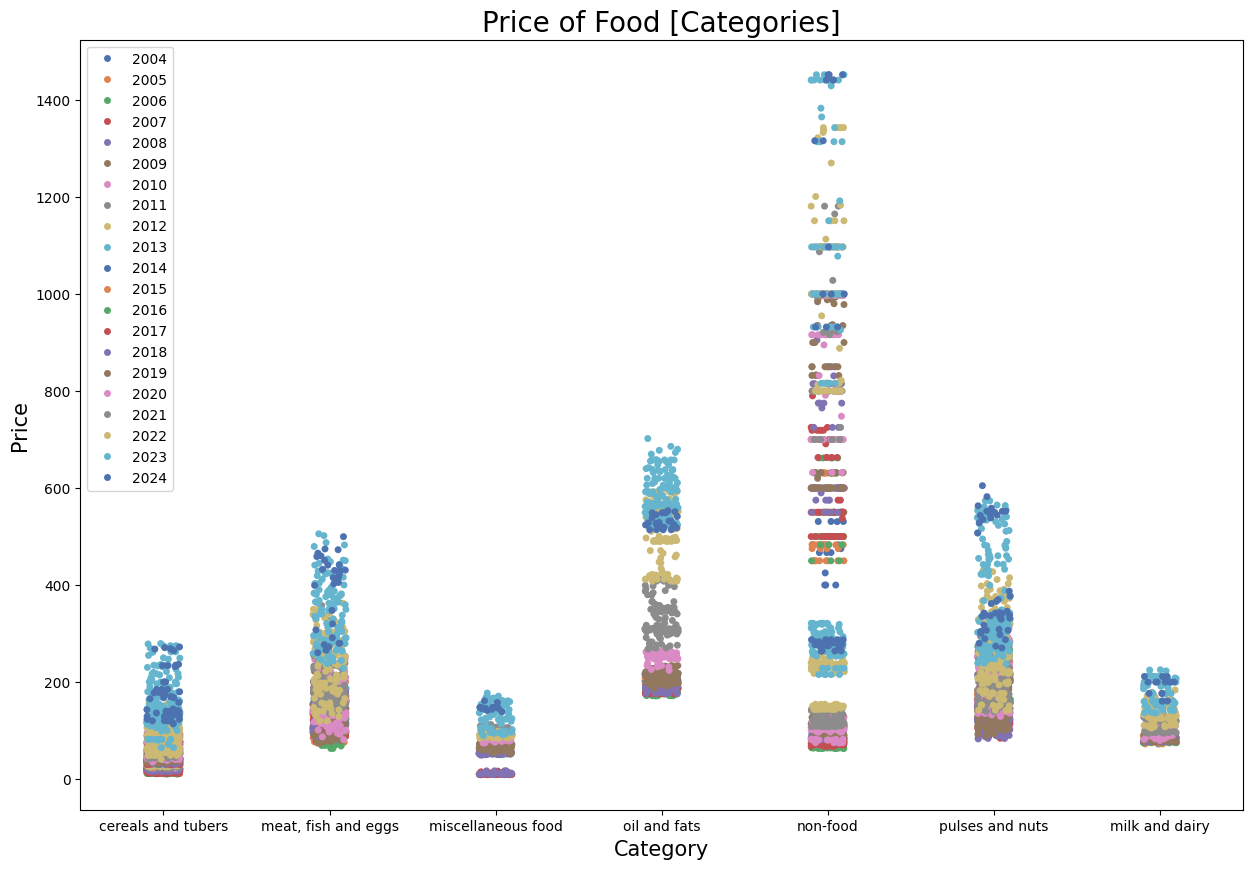

In [234]:
fig = plt.subplots(figsize=(15, 10))
sns.stripplot(x=df["category"], y=df["price"], hue=df["year"],palette="deep")
plt.xlabel("Category", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Food [Categories]", fontsize=20)
plt.legend(loc="upper left")
plt.show()

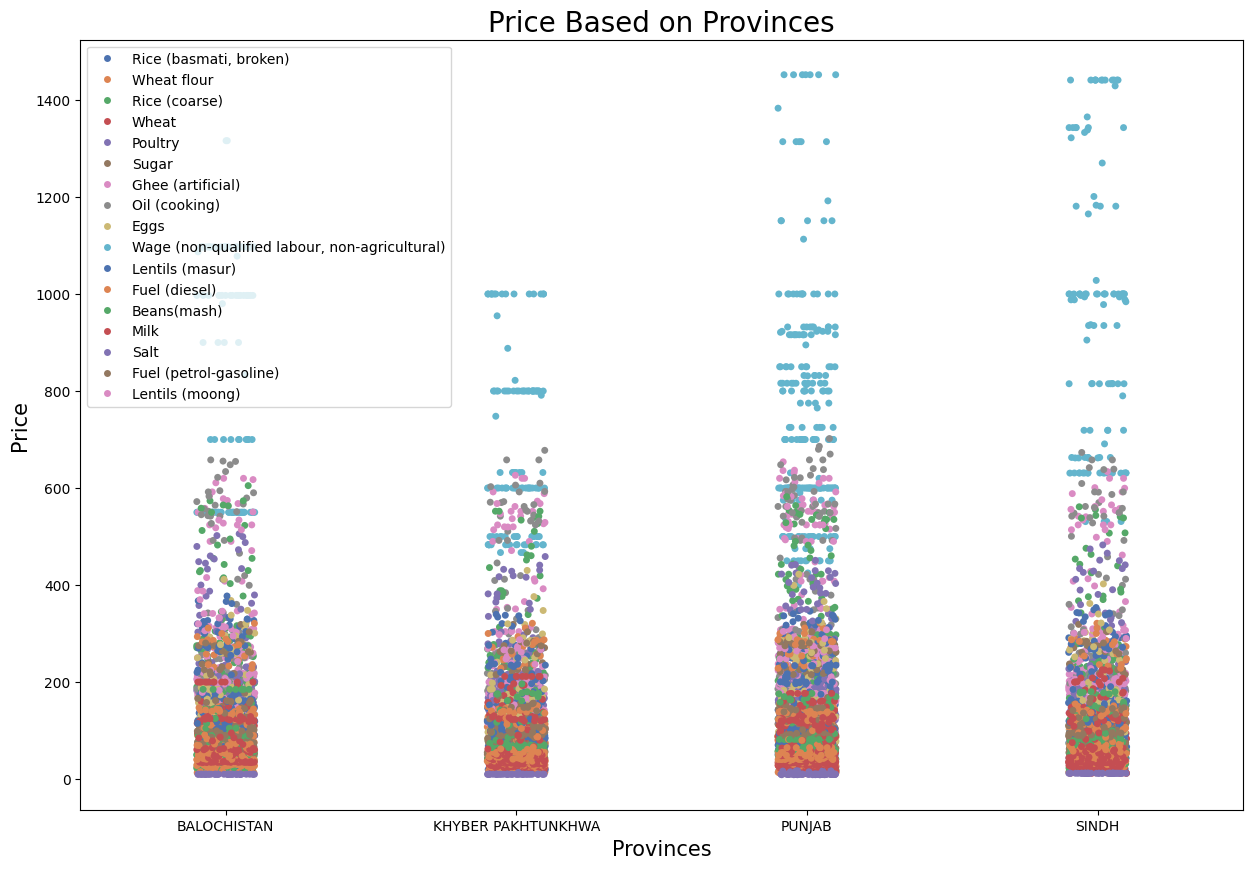

In [235]:
fig = plt.subplots(figsize=(15, 10))
sns.stripplot(x=df["Provinces name"], y=df["price"], hue=df["commodity"],palette="deep")
plt.xlabel("Provinces", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price Based on Provinces", fontsize=20)
plt.legend(loc ="upper left")
plt.savefig('Price based on Provinces.png')
plt.show()

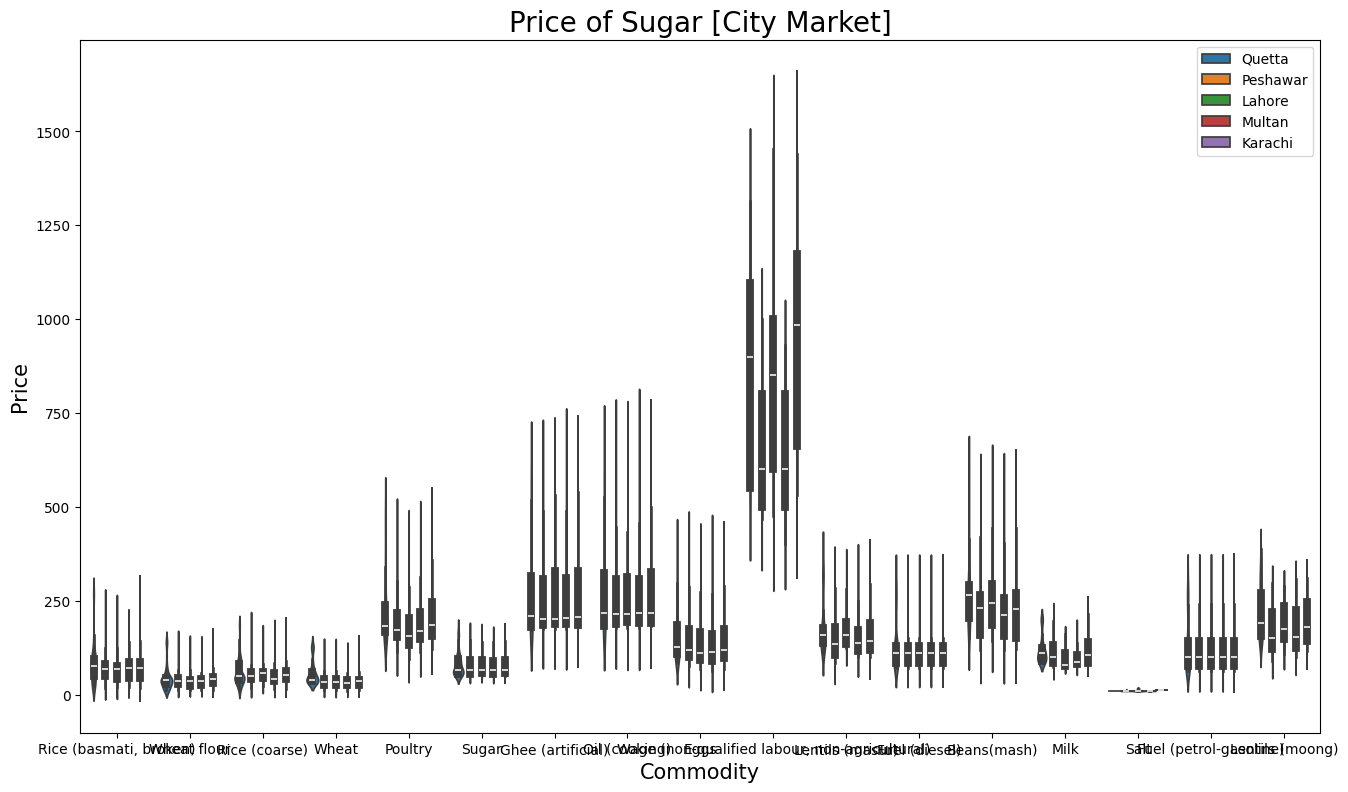

In [236]:
fig = plt.subplots(figsize=(16, 9))

sns.violinplot(x =df["commodity"], y=df["price"], hue=df["City market"])
plt.xticks(rotation=0);
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Sugar [City Market]", fontsize=20)
plt.legend(loc ="upper right")
plt.savefig('Price of Sugar based on City Market.png')

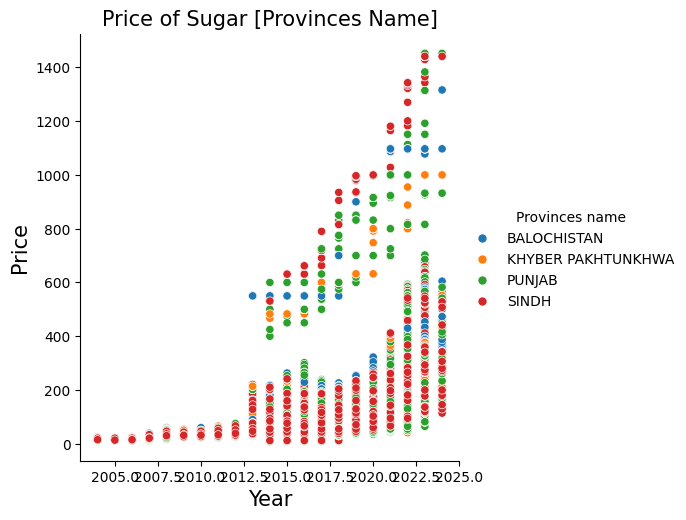

In [237]:
sns.relplot(x = df["year"], y = df["price"], hue=df["Provinces name"])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Sugar [Provinces Name]", fontsize=15)
plt.savefig('Price of Sugar by Provinces Name.png')
plt.show()

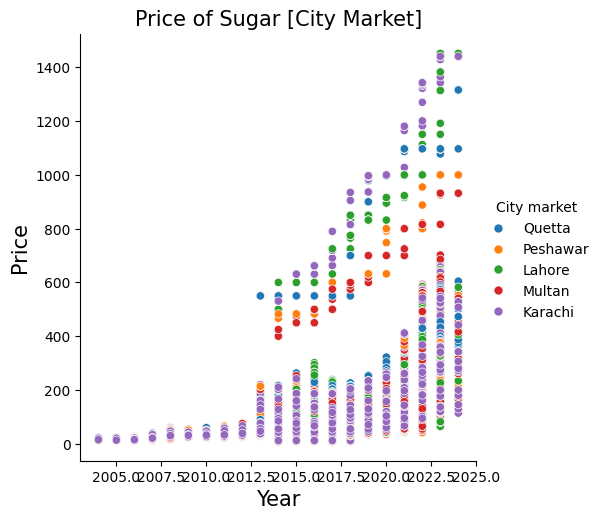

In [238]:
sns.relplot(x = df["year"], y = df["price"], hue = df["City market"])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Sugar [City Market]", fontsize=15)
plt.savefig('Price of Sugar by City Market.png')
plt.show()

In [239]:
wage_food_df = df[df["commodity"].str.contains("Wage (non-qualified labour, non-agricultural)", regex=False)]

In [240]:
wage_food_df

date      Provinces name City Name City market   latitude  \
2135    9/15/2013         BALOCHISTAN    Quetta      Quetta  30.187222   
2175   10/15/2013         BALOCHISTAN    Quetta      Quetta  30.187222   
2200   11/15/2013         BALOCHISTAN    Quetta      Quetta  30.187222   
2247    1/15/2014         BALOCHISTAN    Quetta      Quetta  30.187222   
2259    1/15/2014  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
...           ...                 ...       ...         ...        ...   
11830   3/15/2024         BALOCHISTAN    Quetta      Quetta  30.187222   
11846   3/15/2024  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
11862   3/15/2024              PUNJAB    Lahore      Lahore  31.549722   
11878   3/15/2024              PUNJAB    Multan      Multan  30.195556   
11894   3/15/2024               SINDH   Karachi     Karachi  24.905600   

       longitude  category                                      commodity  \
2135   67.012500  non-food  Wage (non-qualified labour, non-agricultural)   
2175   67.012500  non-food  Wage (non-qualified labour, non-agricultural)   
2200   67.012500  non-food  Wage (non-qualified labour, non-agricultural)   
2247   67.012500  non-food  Wage (non-qualified labour, non-agricultural)   
2259   71.580182  non-food  Wage (non-qualified labour, non-agricultural)   
...          ...       ...                                            ...   
11830  67.012500  non-food  Wage (non-qualified labour, non-agricultural)   
11846  71.580182  non-food  Wage (non-qualified labour, non-agricultural)   
11862  74.343611  non-food  Wage (non-qualified labour, non-agricultural)   
11878  71.475278  non-food  Wage (non-qualified labour, non-agricultural)   
11894  67.082200  non-food  Wage (non-qualified labour, non-agricultural)   

      unit   price  year  month  day  
2135   Day   550.0  2013      9   15  
2175   Day   550.0  2013     10   15  
2200   Day   550.0  2013     11   15  
2247   Day   550.0  2014      1   15  
2259   Day   467.0  2014      1   15  
...    ...     ...   ...    ...  ...  
11830  Day  1316.0  2024      3   15  
11846  Day  1000.0  2024      3   15  
11862  Day  1452.0  2024      3   15  
11878  Day   932.0  2024      3   15  
11894  Day  1441.0  2024      3   15  

[578 rows x 13 columns]

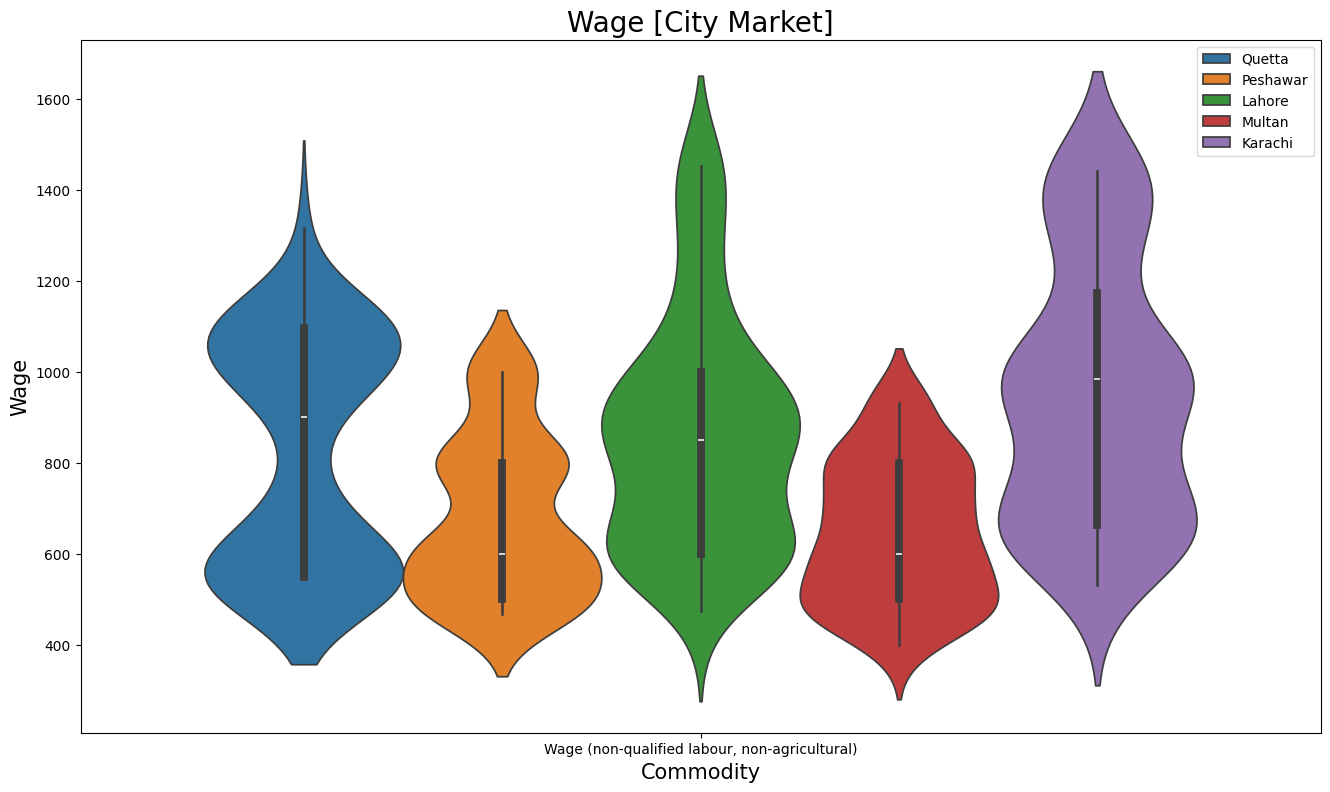

In [241]:
fig = plt.subplots(figsize=(16, 9))
sns.violinplot(x = wage_food_df["commodity"], y = wage_food_df["price"], hue = wage_food_df["City Name"])
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Wage", fontsize=15)
plt.title("Wage [City Market]", fontsize=20)
plt.legend(loc ="upper right")
plt.savefig('Wages by City Market.png')

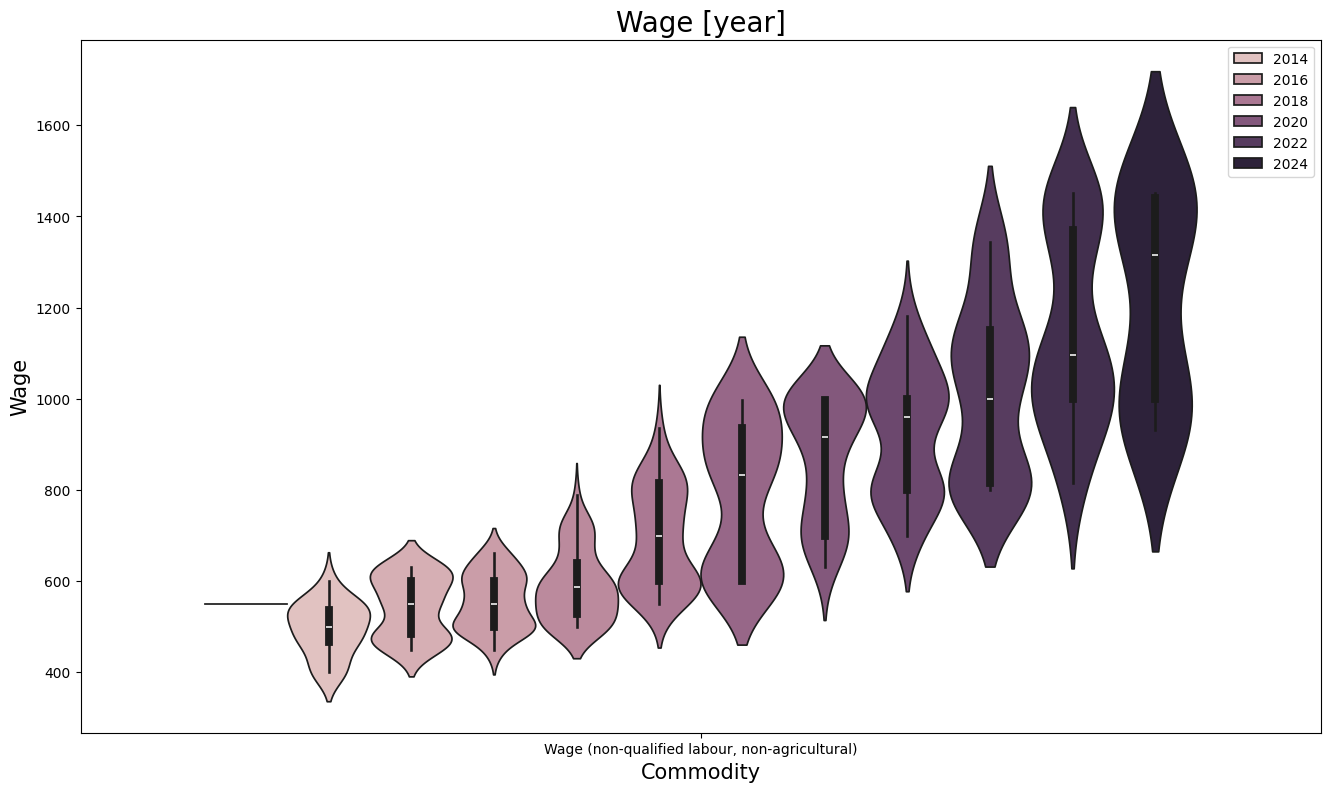

In [242]:
fig = plt.subplots(figsize=(16, 9))
sns.violinplot(x = wage_food_df["commodity"], y = wage_food_df["price"], hue = wage_food_df["year"])
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Wage", fontsize=15)
plt.title("Wage [year]", fontsize=20)
plt.legend(loc ="upper right");
plt.savefig('Wage per year.png')

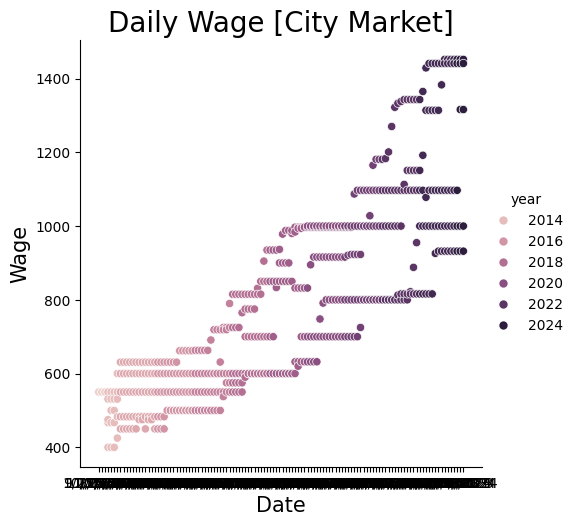

In [243]:
sns.relplot(x =wage_food_df["date"], y=wage_food_df["price"], hue=wage_food_df["year"])
plt.xlabel("Date", fontsize=15)
plt.ylabel("Wage", fontsize=15)
plt.title("Daily Wage [City Market]", fontsize=20)
plt.savefig('Dail wage by city market.png')
plt.show()

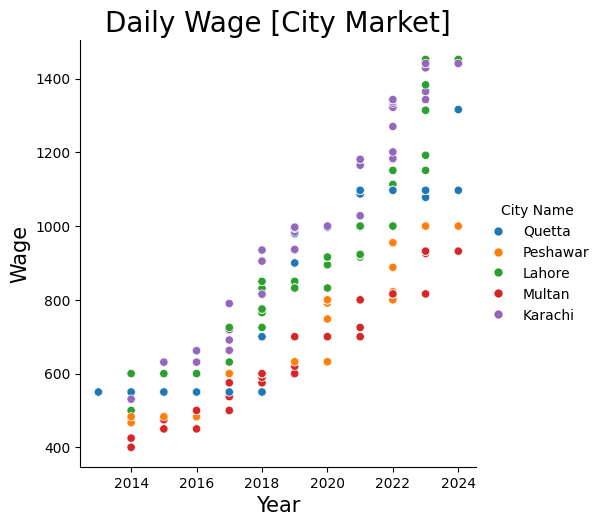

In [244]:
sns.relplot(x =wage_food_df["year"], y=wage_food_df["price"], hue=wage_food_df["City Name"])
plt.xlabel("Year", fontsize=15)
plt.ylabel("Wage", fontsize=15)
plt.title("Daily Wage [City Market]", fontsize=20)
plt.savefig('Daily Wage by City Market.png')
plt.show()

In [245]:
# df.drop(["latitude", "longitude"], axis=1, inplace=True) 
diesel_food_df = df[df["commodity"].str.contains("Fuel (diesel)", regex=False)]
petrol_food_df = df[df["commodity"].str.contains("Fuel (petrol-gasoline)", regex=False)]
print(diesel_food_df["commodity"].unique())
print(petrol_food_df["commodity"].unique())
print("\n", "Diesel Shape", diesel_food_df.shape, "\n", "Gasoline", petrol_food_df.shape, "\n")
print("\n", "Diesel Info", diesel_food_df.info(), "\n", "Gasoline", petrol_food_df.info())

['Fuel (diesel)']
['Fuel (petrol-gasoline)']

 Diesel Shape (615, 13) 
 Gasoline (560, 13) 

<class 'pandas.core.frame.DataFrame'>
Index: 615 entries, 2246 to 11892
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            615 non-null    object 
 1   Provinces name  615 non-null    object 
 2   City Name       615 non-null    object 
 3   City market     615 non-null    object 
 4   latitude        615 non-null    float64
 5   longitude       615 non-null    float64
 6   category        615 non-null    object 
 7   commodity       615 non-null    object 
 8   unit            615 non-null    object 
 9   price           615 non-null    float64
 10  year            615 non-null    int32  
 11  month           615 non-null    int32  
 12  day             615 non-null    int32  
dtypes: float64(3), int32(3), object(7)
memory usage: 60.1+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 2822 t

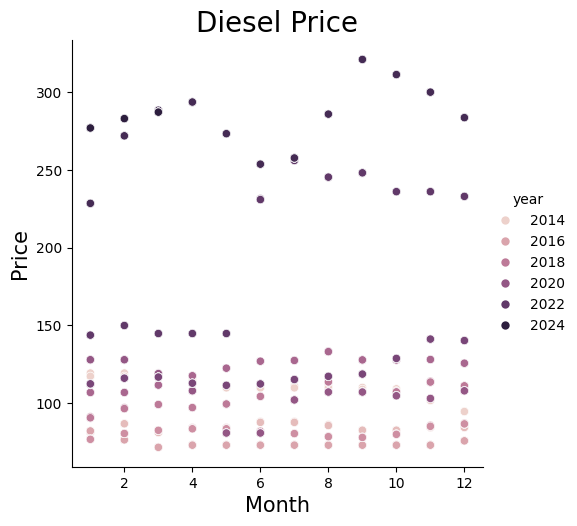

In [246]:
sns.relplot(x = diesel_food_df["month"], y = diesel_food_df["price"], hue = diesel_food_df["year"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Diesel Price", fontsize = 20)
plt.savefig('Diesel Price.png')

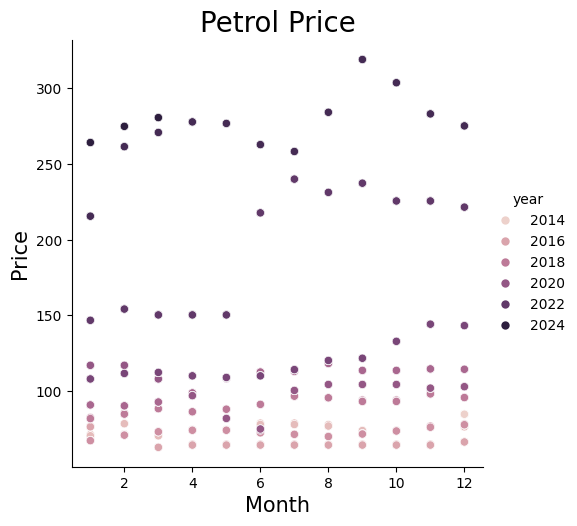

In [247]:
sns.relplot(x = petrol_food_df["month"], y = petrol_food_df["price"], hue = petrol_food_df["year"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Petrol Price", fontsize = 20)
plt.savefig('Price of Petrol.png')


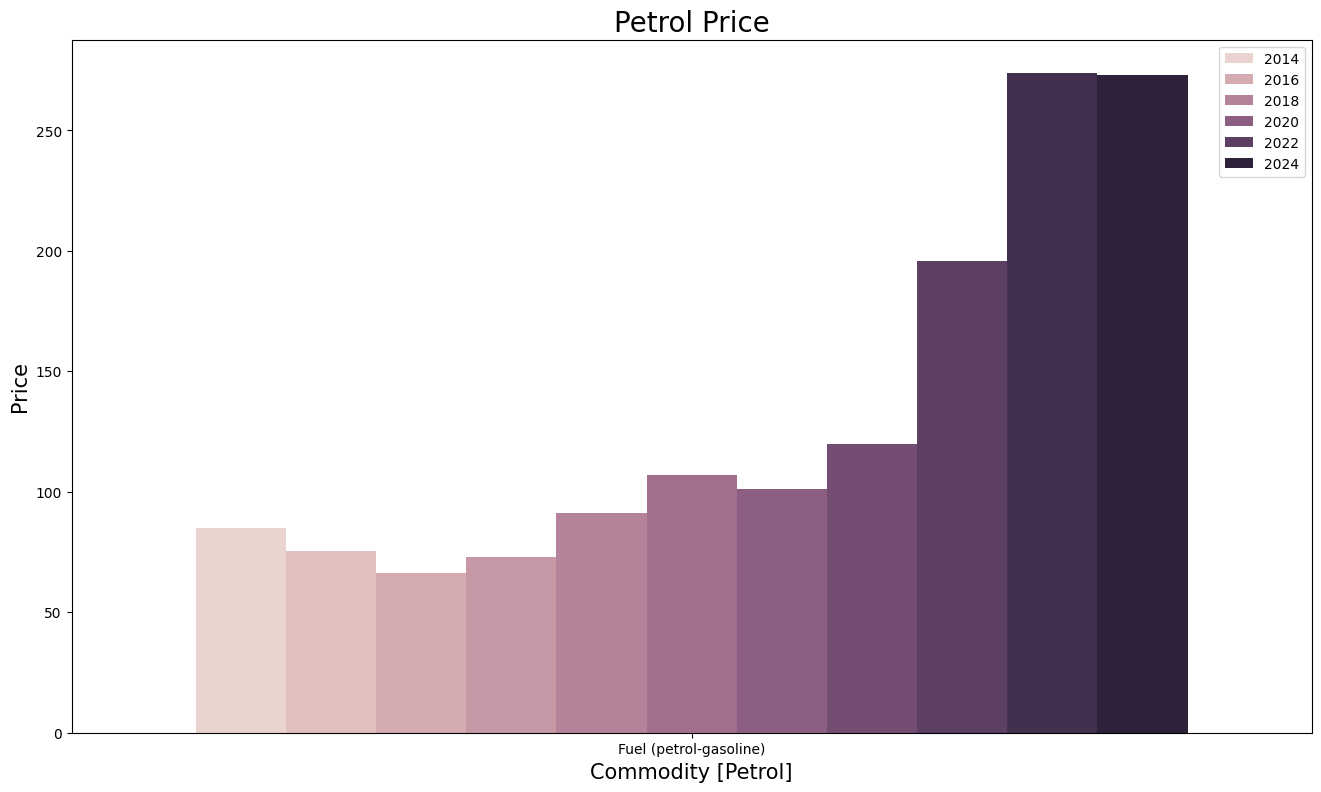

In [248]:
fig = plt.subplots(figsize=(16, 9))
sns.barplot(x=petrol_food_df["commodity"], y = petrol_food_df["price"], hue = petrol_food_df["year"], ci=0 )
plt.xlabel("Commodity [Petrol]", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Petrol Price", fontsize=20)
plt.legend(loc ="upper right")
plt.savefig('Petrol Price.png')

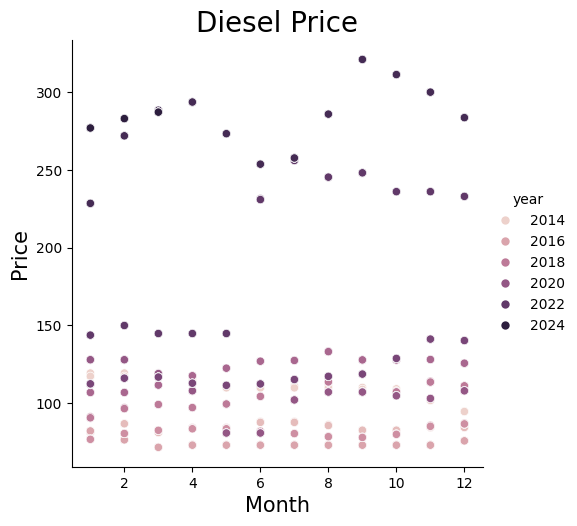

In [249]:
sns.relplot(x = diesel_food_df["month"], y = diesel_food_df["price"], hue = diesel_food_df["year"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Diesel Price", fontsize = 20)
plt.savefig('Price of Diesel.png')

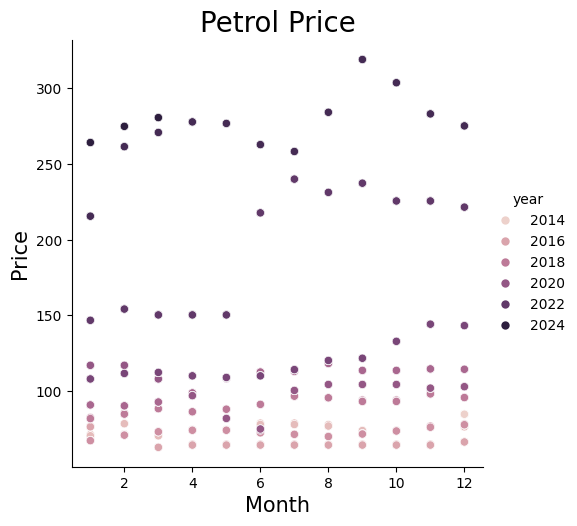

In [250]:
sns.relplot(x = petrol_food_df["month"], y = petrol_food_df["price"], hue = petrol_food_df["year"])
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Price", fontsize = 15)
plt.title("Petrol Price", fontsize = 20)
plt.savefig('Price of Petrol.png')

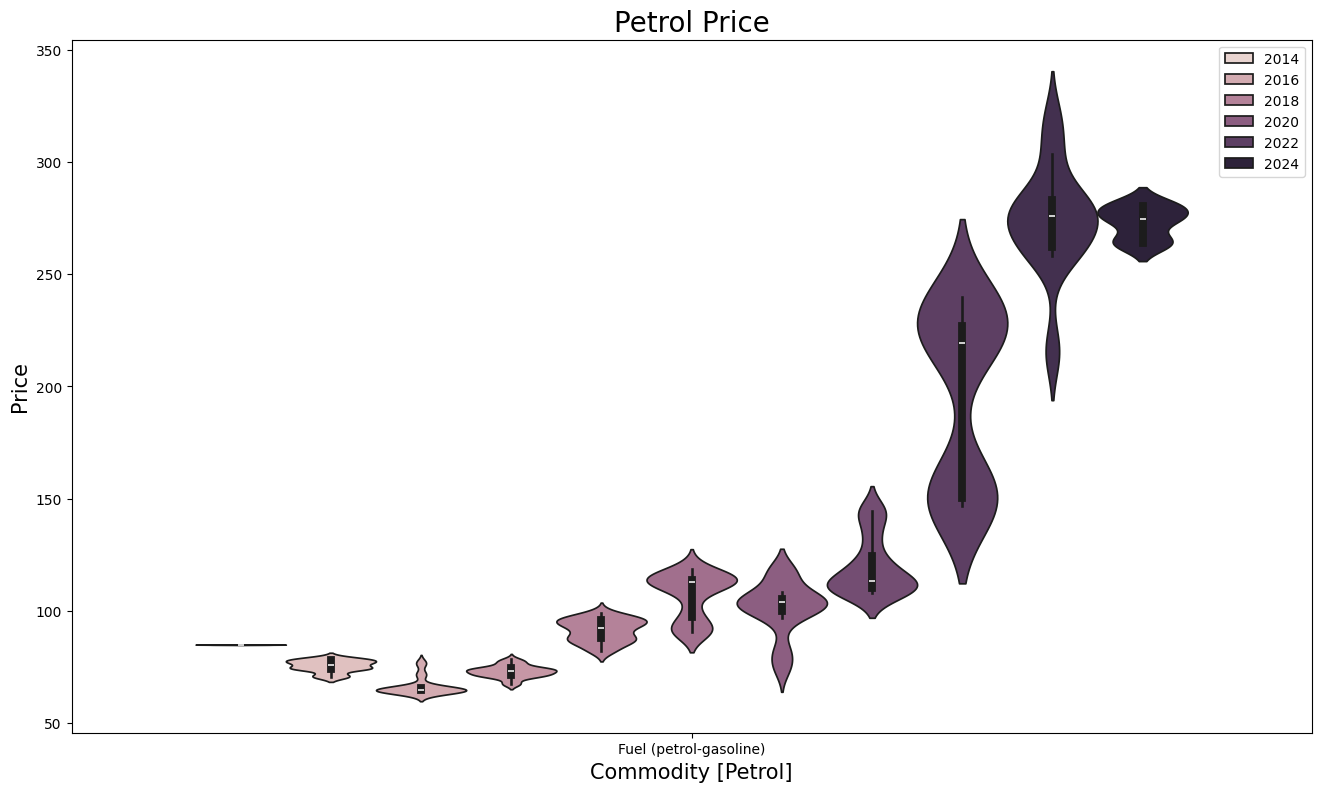

In [251]:
fig = plt.subplots(figsize=(16, 9))
sns.violinplot(x=petrol_food_df["commodity"], y=petrol_food_df["price"], hue=petrol_food_df["year"])
plt.xlabel("Commodity [Petrol]", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Petrol Price", fontsize=20)
plt.legend(loc ="upper right")
plt.savefig('Price of petrol.png')
plt.show()

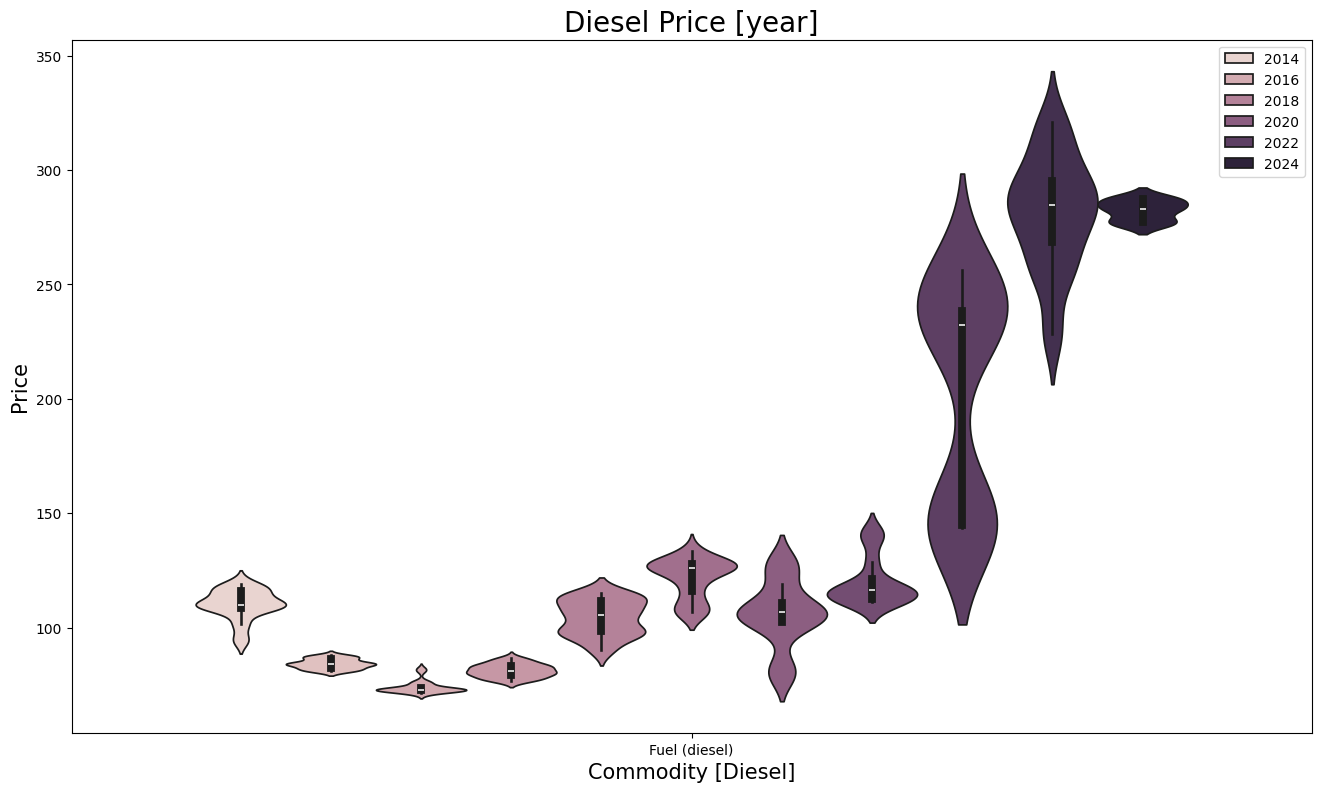

In [252]:
fig = plt.subplots(figsize=(16, 9))
sns.violinplot(x=diesel_food_df["commodity"], y=diesel_food_df["price"], hue=diesel_food_df["year"])
plt.xlabel("Commodity [Diesel]", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Diesel Price [year]", fontsize=20)
plt.legend(loc ="upper right")
plt.savefig('Price of Diesel.png')
plt.show()

In [253]:
df

date      Provinces name City Name City market   latitude  \
0      1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
1      1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
2      1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
3      1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
4      1/15/2004              PUNJAB    Lahore      Lahore  31.549722   
...          ...                 ...       ...         ...        ...   
11895  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11896  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11897  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11898  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11899  3/15/2024               SINDH   Karachi     Karachi  24.905600   

       longitude            category               commodity unit   price  \
0      67.012500  cereals and tubers  Rice (basmati, broken)   KG   20.00   
1      67.012500  cereals and tubers             Wheat flour   KG   13.00   
2      71.580182  cereals and tubers  Rice (basmati, broken)   KG   17.59   
3      71.580182  cereals and tubers             Wheat flour   KG   12.00   
4      74.343611  cereals and tubers  Rice (basmati, broken)   KG   19.15   
...          ...                 ...                     ...  ...     ...   
11895  67.082200        oil and fats       Ghee (artificial)   KG  514.00   
11896  67.082200        oil and fats           Oil (cooking)    L  528.04   
11897  67.082200     pulses and nuts             Beans(mash)   KG  507.53   
11898  67.082200     pulses and nuts         Lentils (masur)   KG  342.36   
11899  67.082200     pulses and nuts         Lentils (moong)   KG  306.73   

       year  month  day  
0      2004      1   15  
1      2004      1   15  
2      2004      1   15  
3      2004      1   15  
4      2004      1   15  
...     ...    ...  ...  
11895  2024      3   15  
11896  2024      3   15  
11897  2024      3   15  
11898  2024      3   15  
11899  2024      3   15  

[11900 rows x 13 columns]

In [254]:
non_food_df = df[df["category"].str.contains("non-food", regex=True)]
non_food_df.drop(["latitude", "longitude"], axis=1, inplace=True)
non_food_df.head()

date Provinces name City Name City market  category  \
2135   9/15/2013    BALOCHISTAN    Quetta      Quetta  non-food   
2175  10/15/2013    BALOCHISTAN    Quetta      Quetta  non-food   
2200  11/15/2013    BALOCHISTAN    Quetta      Quetta  non-food   
2246   1/15/2014    BALOCHISTAN    Quetta      Quetta  non-food   
2247   1/15/2014    BALOCHISTAN    Quetta      Quetta  non-food   

                                          commodity unit  price  year  month  \
2135  Wage (non-qualified labour, non-agricultural)  Day  550.0  2013      9   
2175  Wage (non-qualified labour, non-agricultural)  Day  550.0  2013     10   
2200  Wage (non-qualified labour, non-agricultural)  Day  550.0  2013     11   
2246                                  Fuel (diesel)    L  117.1  2014      1   
2247  Wage (non-qualified labour, non-agricultural)  Day  550.0  2014      1   

      day  
2135   15  
2175   15  
2200   15  
2246   15  
2247   15

In [255]:
non_food = non_food_df[["Provinces name", "City Name", "City market","category", 
                        "commodity", "unit"]]

for i in non_food.columns:
    print("\n", non_food[i].unique())  


 ['BALOCHISTAN' 'KHYBER PAKHTUNKHWA' 'PUNJAB' 'SINDH']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['non-food']

 ['Wage (non-qualified labour, non-agricultural)' 'Fuel (diesel)'
 'Fuel (petrol-gasoline)']

 ['Day' 'L']


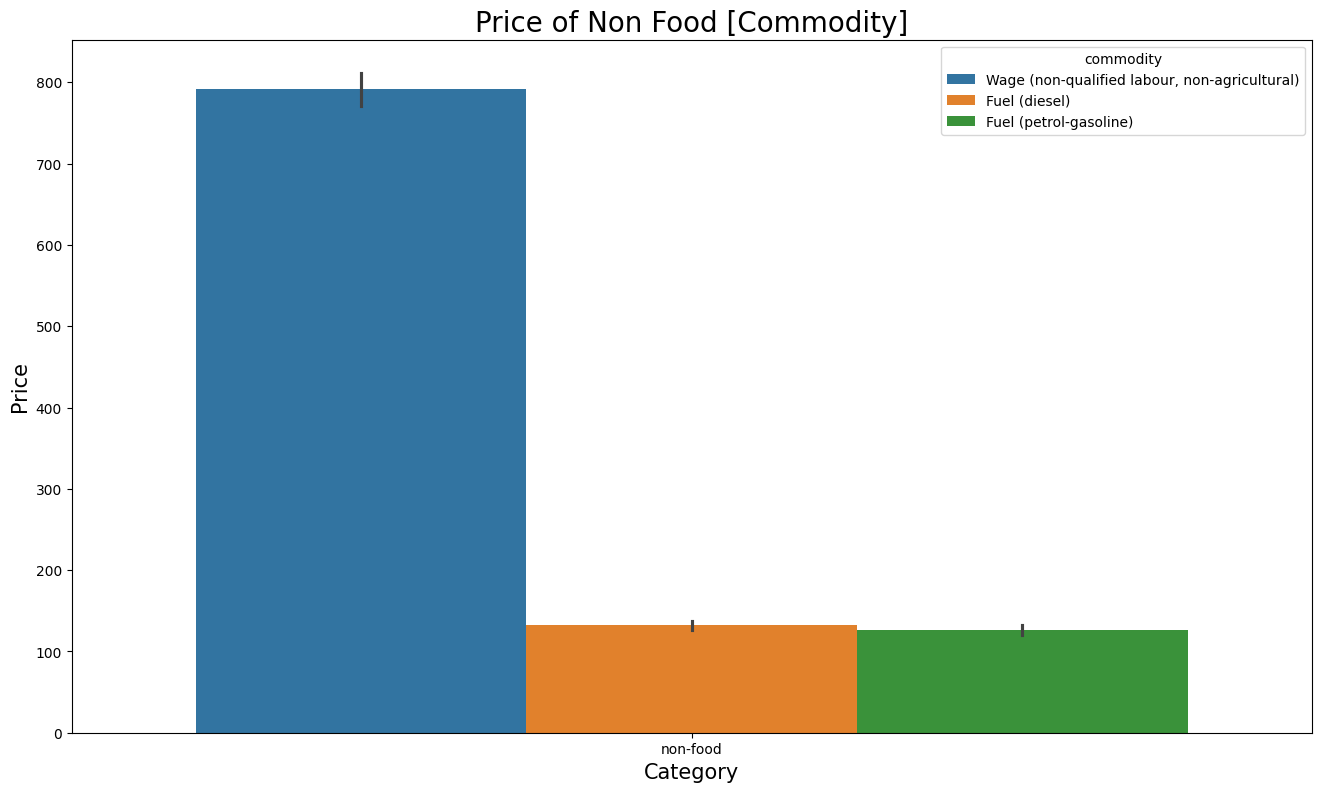

In [256]:
fig = plt.subplots(figsize=(16, 9))
sns.barplot(x=non_food_df["category"], y=non_food_df["price"], hue=non_food_df["commodity"])
plt.xlabel("Category", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Non Food [Commodity]", fontsize=20)
plt.savefig('Price of Non Food Commodity.png')
plt.show()


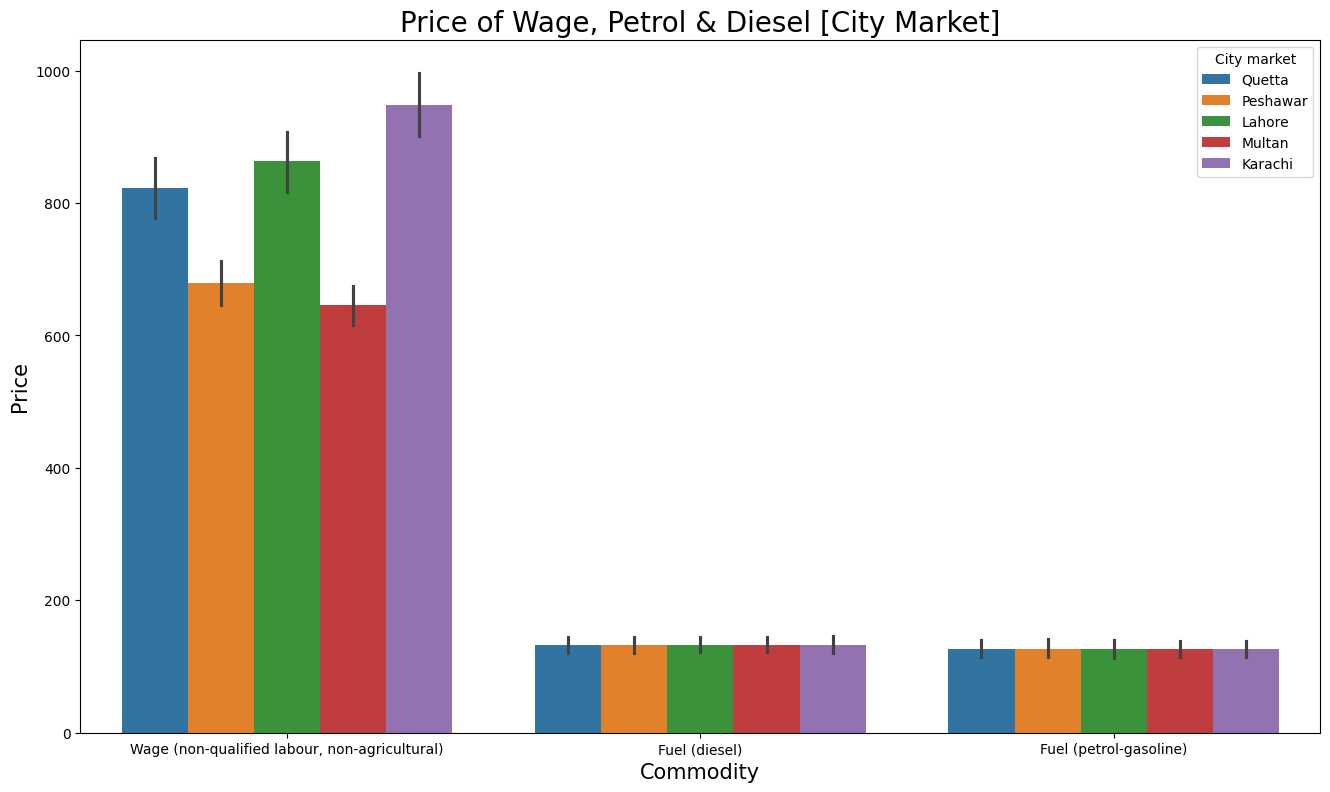

In [257]:
fig = plt.subplots(figsize=(16, 9))
sns.barplot(x=non_food_df["commodity"], y=non_food_df["price"], hue=non_food_df["City market"])
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price of Wage, Petrol & Diesel [City Market]", fontsize=20)
plt.savefig('Price of Wage, Petrol & Diesel [City Market].png')
plt.show()

In [258]:
df

date      Provinces name City Name City market   latitude  \
0      1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
1      1/15/2004         BALOCHISTAN    Quetta      Quetta  30.187222   
2      1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
3      1/15/2004  KHYBER PAKHTUNKHWA  Peshawar    Peshawar  34.008366   
4      1/15/2004              PUNJAB    Lahore      Lahore  31.549722   
...          ...                 ...       ...         ...        ...   
11895  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11896  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11897  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11898  3/15/2024               SINDH   Karachi     Karachi  24.905600   
11899  3/15/2024               SINDH   Karachi     Karachi  24.905600   

       longitude            category               commodity unit   price  \
0      67.012500  cereals and tubers  Rice (basmati, broken)   KG   20.00   
1      67.012500  cereals and tubers             Wheat flour   KG   13.00   
2      71.580182  cereals and tubers  Rice (basmati, broken)   KG   17.59   
3      71.580182  cereals and tubers             Wheat flour   KG   12.00   
4      74.343611  cereals and tubers  Rice (basmati, broken)   KG   19.15   
...          ...                 ...                     ...  ...     ...   
11895  67.082200        oil and fats       Ghee (artificial)   KG  514.00   
11896  67.082200        oil and fats           Oil (cooking)    L  528.04   
11897  67.082200     pulses and nuts             Beans(mash)   KG  507.53   
11898  67.082200     pulses and nuts         Lentils (masur)   KG  342.36   
11899  67.082200     pulses and nuts         Lentils (moong)   KG  306.73   

       year  month  day  
0      2004      1   15  
1      2004      1   15  
2      2004      1   15  
3      2004      1   15  
4      2004      1   15  
...     ...    ...  ...  
11895  2024      3   15  
11896  2024      3   15  
11897  2024      3   15  
11898  2024      3   15  
11899  2024      3   15  

[11900 rows x 13 columns]

In [259]:
columns_to_drop = ['date','latitude','longitude','City market','day','month','year']

In [260]:
df = df.drop(columns=columns_to_drop)
df.columns

Index(['Provinces name', 'City Name', 'category', 'commodity', 'unit',
       'price'],
      dtype='object')

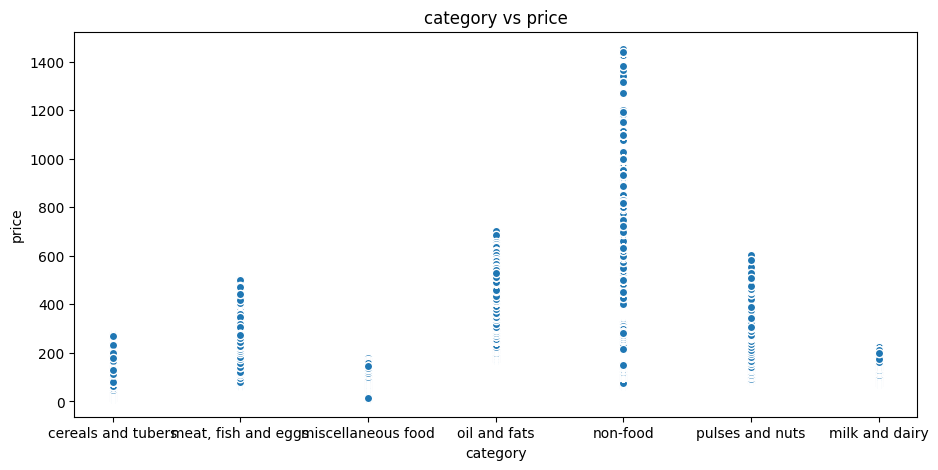

In [261]:
plt.figure(figsize=(50,5))
plt.subplot(1,4,1)
plt.scatter(x=df['category'],y=df['price'],edgecolors='white')
plt.title('category vs price')
plt.xlabel('category')
plt.ylabel('price')
plt.savefig("category vs price.png")

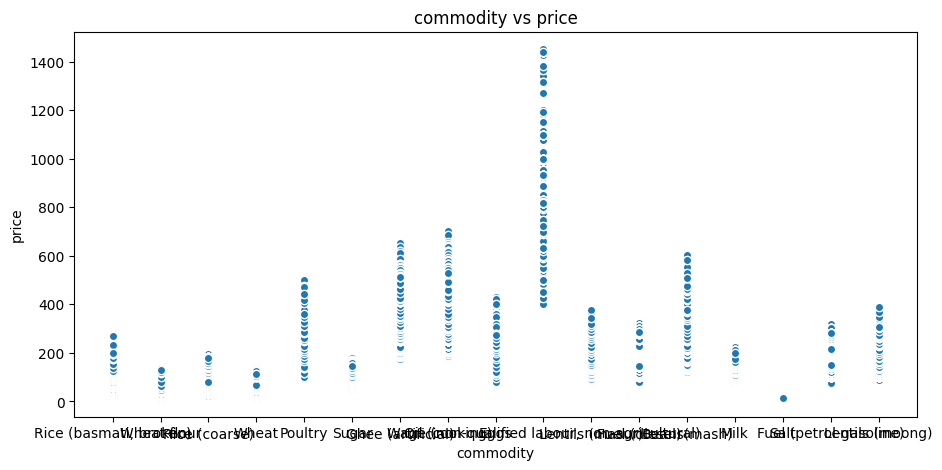

In [262]:
plt.figure(figsize=(50,5))
plt.subplot(1,4,1)
plt.scatter(x=df['commodity'],y=df['price'],edgecolors='white')
plt.title('commodity vs price')
plt.xlabel('commodity')
plt.ylabel('price')
plt.savefig("commodity vs price")

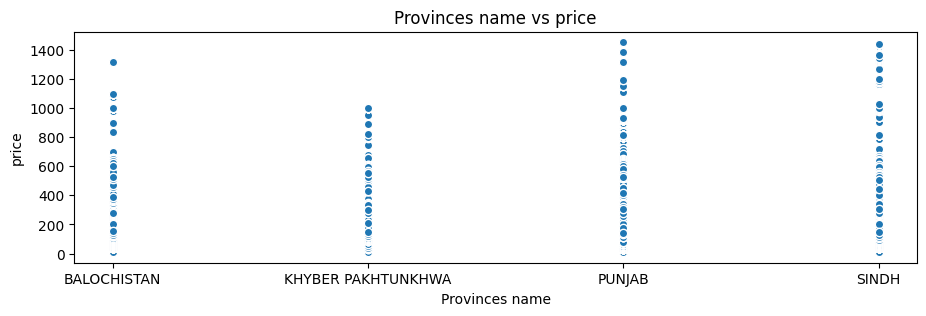

In [263]:
plt.figure(figsize=(50,3))
plt.subplot(1,4,1)
plt.scatter(x=df['Provinces name'],y=df['price'],edgecolors='white')
plt.title('Provinces name vs price')
plt.xlabel('Provinces name')
plt.ylabel('price')
plt.savefig("provinces names vs price")

## Choosing Machine Learning Model

## Choose
As you can see that one  realtion is not enough to predict the Price. So, we have to use Multivarible Model  

In [264]:
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score



In [265]:
le = LabelEncoder()

In [266]:
y=df['price']
x=df.drop("price",axis=1)

y

0         20.00
1         13.00
2         17.59
3         12.00
4         19.15
          ...  
11895    514.00
11896    528.04
11897    507.53
11898    342.36
11899    306.73
Name: price, Length: 11900, dtype: float64

In [267]:
le.fit(np.unique(x))
x

Provinces name City Name            category  \
0             BALOCHISTAN    Quetta  cereals and tubers   
1             BALOCHISTAN    Quetta  cereals and tubers   
2      KHYBER PAKHTUNKHWA  Peshawar  cereals and tubers   
3      KHYBER PAKHTUNKHWA  Peshawar  cereals and tubers   
4                  PUNJAB    Lahore  cereals and tubers   
...                   ...       ...                 ...   
11895               SINDH   Karachi        oil and fats   
11896               SINDH   Karachi        oil and fats   
11897               SINDH   Karachi     pulses and nuts   
11898               SINDH   Karachi     pulses and nuts   
11899               SINDH   Karachi     pulses and nuts   

                    commodity unit  
0      Rice (basmati, broken)   KG  
1                 Wheat flour   KG  
2      Rice (basmati, broken)   KG  
3                 Wheat flour   KG  
4      Rice (basmati, broken)   KG  
...                       ...  ...  
11895       Ghee (artificial)   KG  
11896           Oil (cooking)    L  
11897             Beans(mash)   KG  
11898         Lentils (masur)   KG  
11899         Lentils (moong)   KG  

[11900 rows x 5 columns]

In [268]:
x.values[0]

array(['BALOCHISTAN', 'Quetta', 'cereals and tubers',
       'Rice (basmati, broken)', 'KG'], dtype=object)

In [269]:
x= pd.DataFrame(le.transform(samp) for samp in x.values)

In [270]:
import numpy
temp = pd.DataFrame({
    'Provinces name': ['BALOCHISTAN'],
    'category': ['cereals and tubers'],
    'commodity': ['Rice (basmati, broken)']
})
# temp = numpy.array(['BALOCHISTAN', 'cereals and tubers', 'Rice (basmati, broken)'], dtype=object) 
print(temp.values, type(temp))
temp.values

temp2 = pd.DataFrame(le.transform(samp) for samp in temp.values)
temp2

[['BALOCHISTAN' 'cereals and tubers' 'Rice (basmati, broken)']] <class 'pandas.core.frame.DataFrame'>


0   1   2
0  0  30  22

In [271]:
x

0   1   2   3   4
0       0  21  30  22   8
1       0  21  30  29   8
2       9  19  30  22   8
3       9  19  30  29   8
4      18  12  30  22   8
...    ..  ..  ..  ..  ..
11895  24  10  35   7   8
11896  24  10  35  17  11
11897  24  10  36   1   8
11898  24  10  36  13   8
11899  24  10  36  14   8

[11900 rows x 5 columns]

In [272]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [273]:
X_test

0   1   2   3   4
6361   18  16  35   7   8
3043    0  21  32  15  11
2584    9  19  35  17  11
8496   18  12  30  28   8
9128    9  19  34  27   2
...    ..  ..  ..  ..  ..
3759    0  21  30  28   8
11653  24  10  34   6  11
6002   18  12  30  23   8
1667    0  21  30  29   8
11457  18  12  31   4   3

[2975 rows x 5 columns]

In [274]:
X_train.shape

(8925, 5)

In [275]:
X_test.shape

(2975, 5)

In [276]:
y_test.values.reshape

<function ndarray.reshape>

In [277]:
y_test

6361     190.00
3043      90.00
2584     216.00
8496      55.10
9128     800.00
          ...  
3759      36.80
11653    275.09
6002      57.00
1667      33.00
11457    312.86
Name: price, Length: 2975, dtype: float64

In [278]:
y_train.values.reshape

<function ndarray.reshape>

In [279]:
y_train

3464      71.79
3431     173.08
6547     146.25
9322     308.00
4428      67.65
          ...  
4859     186.46
3264      83.91
9845      88.38
10799    142.39
2732     155.00
Name: price, Length: 8925, dtype: float64

In [280]:
from sklearn.preprocessing import LabelEncoder
import joblib

model = RandomForestRegressor()
model.fit(X_train, y_train)





RandomForestRegressor()

# Support Vector Machine

In [292]:
# Create a Random Forest Regressor
support_vector = svm.SVR()

# Train the model
support_vector.fit(X_test, y_test)

# Make predictions on the test set
y_pred = support_vector.predict(X_test)


# Evaluate Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE)',rmse)
print("Mean Square Error", mse)
print("Mean Absolute Error", mae)
print("R 2 Score", r2*100)
print("Explained Variance Score", evs*100)


####### Price Prediction
joblib.dump(support_vector, 'food_price_prediction_model.pkl')
model = joblib.load('food_price_prediction_model.pkl')

import numpy
temp = pd.DataFrame({
    'Provinces name': ['PUNJAB'],
    'City Name': ['Multan'],
    'category': ['non-food'],
    'commodity': ['Fuel (diesel)'],
    'unit': ["L"],
})
print(temp.values, type(temp))
temp2 = pd.DataFrame(le.transform(samp) for samp in temp.values)
X_new = temp2
predicted_price = model.predict(X_new)
print("Predicted price:", predicted_price)

Root Mean Squared Error (RMSE) 187.24817027366615
Mean Square Error 35061.87727083587
Mean Absolute Error 87.09773755556745
R 2 Score -1.8235738258418621
Explained Variance Score 7.0978193790827815
[['PUNJAB' 'Multan' 'non-food' 'Fuel (diesel)' 'L']] <class 'pandas.core.frame.DataFrame'>
Predicted price: [165.09851908]


# Linear Regression

In [293]:
# Create a Linear Regressor
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()

# Train the model
linear_regression.fit(X_test, y_test)

# Make predictions on the test set
y_pred = linear_regression.predict(X_test)

print(y_pred)
# Make predictions on the test set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE)',rmse)
print("Mean Square Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2*100)
print("Explained Variance Score", evs*100)

####### Price Prediction
joblib.dump(linear_regression, 'food_price_prediction_model.pkl')
model = joblib.load('food_price_prediction_model.pkl')

import numpy
temp = pd.DataFrame({
    'Provinces name': ['PUNJAB'],
    'City Name': ['Multan'],
    'category': ['non-food'],
    'commodity': ['Fuel (diesel)'],
    'unit': ["L"],
})
temp2 = pd.DataFrame(le.transform(samp) for samp in temp.values)
X_new = temp2
predicted_price = model.predict(X_new)
print("\n\nPredicted price:", predicted_price)

[243.30933354  15.71284168 164.52870141 ...  65.25424661  90.15704772
 251.37845125]
Root Mean Squared Error (RMSE) 136.74943367647194
Mean Square Error 18700.4076108358
Mean Absolute Error 92.23647825267363
R2 Score 45.69194569284739
Explained Variance Score 45.69194569284739


Predicted price: [60.87500409]


## MLPRegressor

In [294]:
# Create an MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
nn.fit(X_test, y_test)

# Make predictions on the test set
y_pred = nn.predict(X_test)


# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE)',rmse)
print("Mean Square Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2*100)
print("Explained Variance Score", evs*100)


####### Price Prediction
joblib.dump(nn, 'food_price_prediction_model.pkl')
model = joblib.load('food_price_prediction_model.pkl')

import numpy
temp = pd.DataFrame({
    'Provinces name': ['PUNJAB'],
    'City Name': ['Multan'],
    'category': ['non-food'],
    'commodity': ['Fuel (diesel)'],
    'unit': ["L"],
})
temp2 = pd.DataFrame(le.transform(samp) for samp in temp.values)
X_new = temp2
predicted_price = model.predict(X_new)
print("\n\nPredicted price:", predicted_price)

Root Mean Squared Error (RMSE) 97.72518590281761
Mean Square Error 9550.211959740263
Mean Absolute Error 60.33100197182891
R2 Score 72.26512702034029
Explained Variance Score 72.30319423952365


Predicted price: [148.94459322]


## AdaBoostRegressor

In [295]:
# Create an AdaBoostRegressor with a base estimator (e.g., DecisionTreeRegressor)
base_estimator = DecisionTreeRegressor(max_depth=1)
adaboost_regressor = AdaBoostRegressor(estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = adaboost_regressor.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)

print('Root Mean Squared Error (RMSE)',rmse)
print("Mean Square Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2*100)
print("Explained Variance Score", evs*100)


####### Price Prediction
joblib.dump(adaboost_regressor, 'food_price_prediction_model.pkl')
model = joblib.load('food_price_prediction_model.pkl')

import numpy
temp = pd.DataFrame({
    'Provinces name': ['PUNJAB'],
    'City Name': ['Multan'],
    'category': ['non-food'],
    'commodity': ['Fuel (diesel)'],
    'unit': ["L"],
})
print(temp.values, type(temp))
temp2 = pd.DataFrame(le.transform(samp) for samp in temp.values)
X_new = temp2
predicted_price = model.predict(X_new)
print("Predicted price:", predicted_price)

Root Mean Squared Error (RMSE) 125.81737900766288
Mean Square Error 15830.012860357889
Mean Absolute Error 95.71282922510038
R2 Score 54.02788987310117
Explained Variance Score 55.48104718691156
[['PUNJAB' 'Multan' 'non-food' 'Fuel (diesel)' 'L']] <class 'pandas.core.frame.DataFrame'>
Predicted price: [150.83374363]


## Random Forest Regressor

In [296]:
# Create a Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE)',rmse)
print("Mean Square Error", mse)
print("Mean Absolute Error", mae)
print("R2 Score", r2*100)
print("Explained Variance Score", evs*100)



####### Price Prediction
joblib.dump(random_forest_regressor, 'food_price_prediction_model.pkl')
model = joblib.load('food_price_prediction_model.pkl')

import numpy
temp = pd.DataFrame({
    'Provinces name': ['PUNJAB'],
    'City Name': ['Multan'],
    'category': ['non-food'],
    'commodity': ['Fuel (diesel)'],
    'unit': ["L"],
})
print(temp.values, type(temp))
temp2 = pd.DataFrame(le.transform(samp) for samp in temp.values)
X_new = temp2
predicted_price = model.predict(X_new)
print("Predicted price:", predicted_price)


Root Mean Squared Error (RMSE) 85.75170224120798
Mean Square Error 7353.354437264795
Mean Absolute Error 52.767804124869386
R2 Score 78.64504451296986
Explained Variance Score 78.65568217211553
[['PUNJAB' 'Multan' 'non-food' 'Fuel (diesel)' 'L']] <class 'pandas.core.frame.DataFrame'>
Predicted price: [129.18115098]


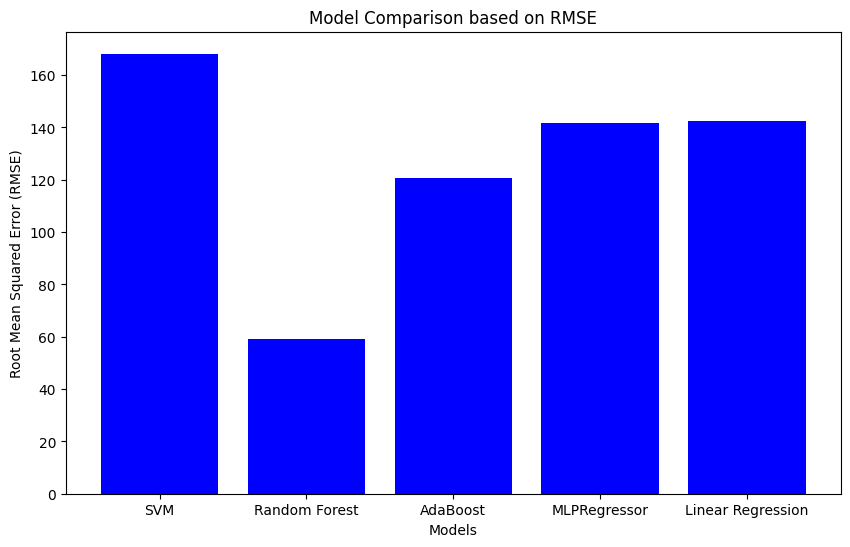

In [286]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their corresponding RMSE values
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'MLPRegressor', 'Linear Regression']
rmse_values = [168.2, 59.3, 120.6, 141.8, 142.5]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='blue')
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Model Comparison based on RMSE')
plt.show()


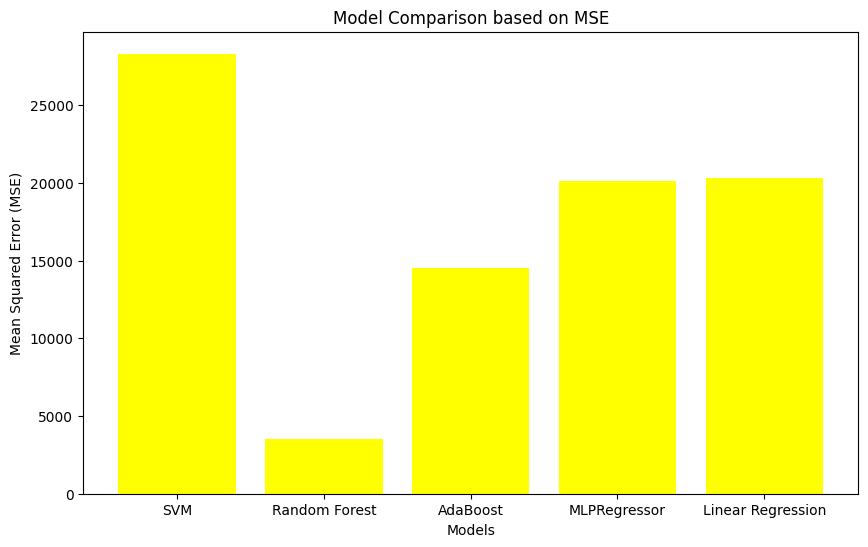

<Figure size 640x480 with 0 Axes>

In [287]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their corresponding RMSE values
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'MLPRegressor', 'Linear Regression']
rmse_values = [28316.5, 3517.6, 14549.7, 20130.5, 20315.5]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='yellow')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model Comparison based on MSE')
plt.show()
plt.savefig("MSE.png")


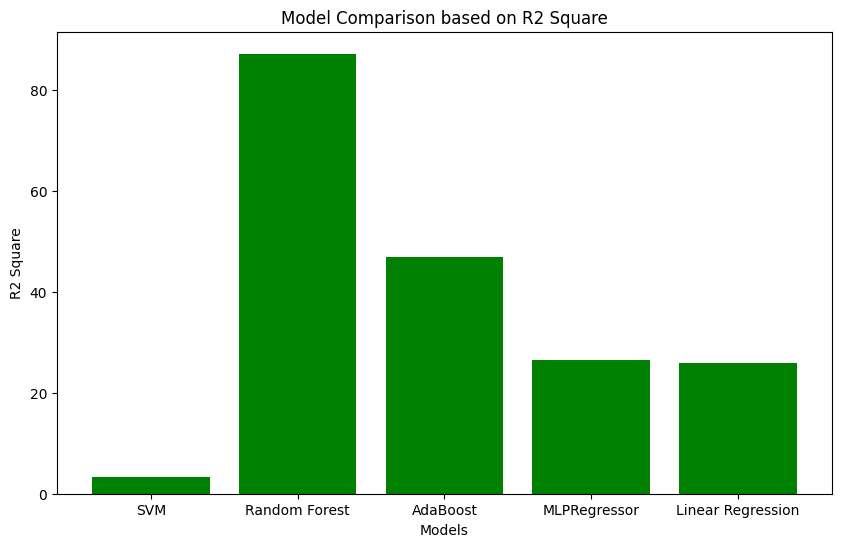

<Figure size 640x480 with 0 Axes>

In [288]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their corresponding RMSE values
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'MLPRegressor', 'Linear Regression']
r2_values = [3.29, 87.1, 46.92, 26.5, 25.8]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color='green')
plt.xlabel('Models')
plt.ylabel('R2 Square')
plt.title('Model Comparison based on R2 Square')
plt.show()
plt.savefig("R2 Sqauare.png")

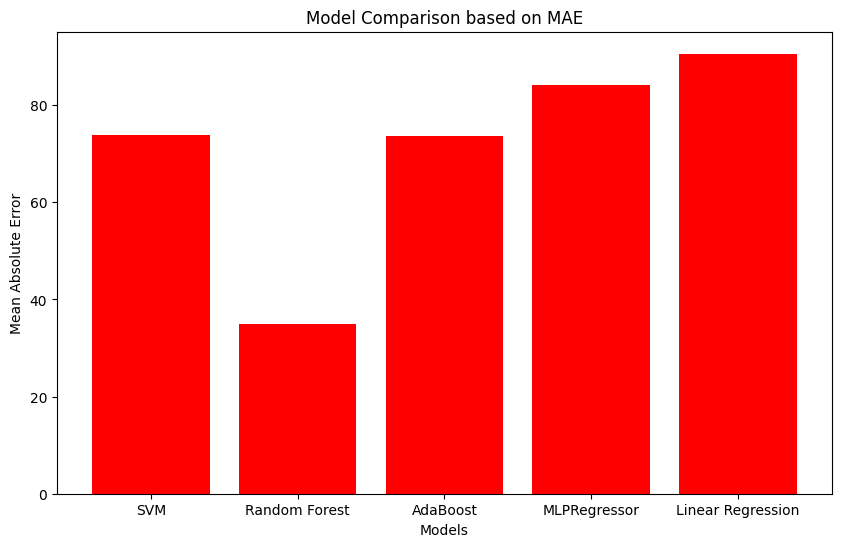

<Figure size 640x480 with 0 Axes>

In [289]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their corresponding RMSE values
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'MLPRegressor', 'Linear Regression']
mae_values = [73.8, 34.9, 73.7, 84.1, 90.6]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_values, color='Red')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error')
plt.title('Model Comparison based on MAE')
plt.show()
plt.savefig("MAE.png")

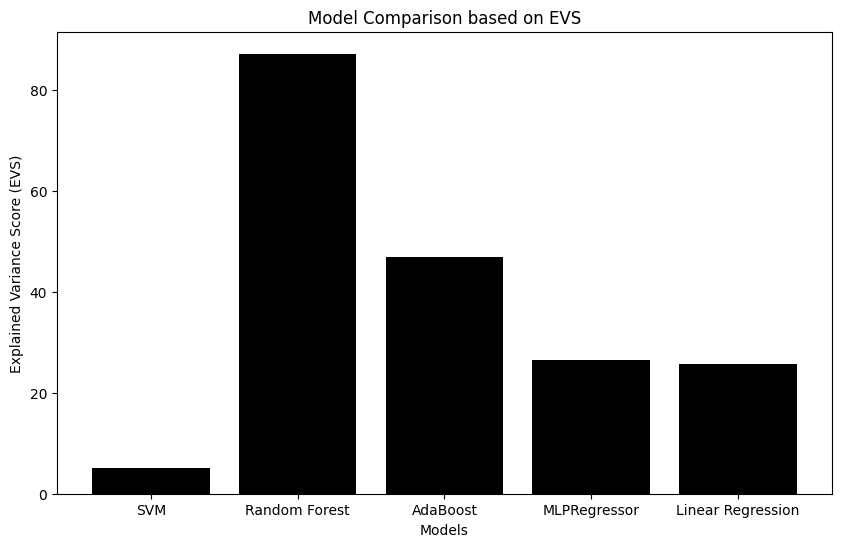

<Figure size 640x480 with 0 Axes>

In [290]:
import matplotlib.pyplot as plt

# Assuming you have a list of model names and their corresponding RMSE values
model_names = ['SVM', 'Random Forest', 'AdaBoost', 'MLPRegressor', 'Linear Regression']
rmse_values = [5.04, 87.20, 46.96, 26.6, 25.8]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color='black')
plt.xlabel('Models')
plt.ylabel('Explained Variance Score (EVS)')
plt.title('Model Comparison based on EVS')
plt.show()
plt.savefig("EVS.png")

In [291]:
# def get_food_analysis(food_name):
#     # Assume food_analysis_model is your trained machine learning model
#     # and food_data is your dataset
#     # Replace this with your actual model and dataset
#     food_analysis_model = None
#     food_data = None

#     # Get the specific food item from the dataset
#     food_item = food_data[food_data['Item'] == food_name]

#     if not food_item.empty:
#         # Assuming columns 'Province', 'Price', 'Category', and 'Nutrition' exist in your dataset
#         province = food_item['Province'].values[0]
#         price = food_item['Price'].values[0]
#         category = food_item['Category'].values[0]
#         nutrition = food_item['Nutrition'].values[0]

#         # Perform analysis using your trained model
#         # Replace this with your actual analysis code
#         analysis_results = food_analysis_model.predict(food_item)

#         return {
#             'Food Name': food_name,
#             'Province': province,
#             'Price': price,
#             'Category': category,
#             'Nutrition': nutrition,
#             'Analysis Results': analysis_results
#         }
#     else:
#         return None

# # Example usage
# food_name = 'Apple'  # Example food item
# result = get_food_analysis(food_name)
# if result:
#     print("Food Analysis Results:")
#     for key, value in result.items():
#         print(f"{key}: {value}")
# else:
#     print("Food not found in dataset")
